## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
    
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
cc = pd.read_csv('credit_card.csv')
cc.rename(columns={'PAY_1':'Repay_Sept', 'PAY_2':'Repay_Aug', 'PAY_3':'Repay_July', 
                   'PAY_4':'Repay_Jun', 'PAY_5':'Repay_May', 'PAY_6':'Repay_April',
                   'BILL_AMT1':'Bill_Amt_Sept', 'BILL_AMT2':'Bill_Amt_Aug', 'BILL_AMT3':'Bill_Amt_July', 
                   'BILL_AMT4':'Bill_Amt_Jun', 'BILL_AMT5':'Bill_Amt_May', 'BILL_AMT6':'Bill_Amt_April',
                   'PAY_AMT1':'Pre_Pay_Sept', 'PAY_AMT2':'Pre_Pay_Aug', 'PAY_AMT3':'Pre_Pay_July', 
                   'PAY_AMT4':'Pre_Pay_Jun', 'PAY_AMT5':'Pre_Pay_May', 'PAY_AMT6':'Pre_Pay_April'
                  }, inplace=True)
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repay_Sept,Repay_Aug,Repay_July,Repay_Jun,Repay_May,Repay_April,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_April,Pre_Pay_Sept,Pre_Pay_Aug,Pre_Pay_July,Pre_Pay_Jun,Pre_Pay_May,Pre_Pay_April,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,1000,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
Repay_Sept        30000 non-null int64
Repay_Aug         30000 non-null int64
Repay_July        30000 non-null int64
Repay_Jun         30000 non-null int64
Repay_May         30000 non-null int64
Repay_April       30000 non-null int64
Bill_Amt_Sept     30000 non-null int64
Bill_Amt_Aug      30000 non-null int64
Bill_Amt_July     30000 non-null int64
Bill_Amt_Jun      30000 non-null int64
Bill_Amt_May      30000 non-null int64
Bill_Amt_April    30000 non-null int64
Pre_Pay_Sept      30000 non-null int64
Pre_Pay_Aug       30000 non-null int64
Pre_Pay_July      30000 non-null int64
Pre_Pay_Jun       30000 non-null int64
Pre_Pay_May       30000 non-null 

## EDA

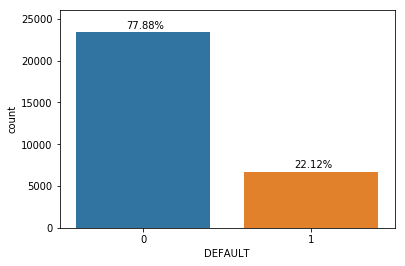

In [4]:
ax = sns.countplot(cc['DEFAULT'])
ax.set_ylim(0,26000)

for p in ax.patches:
    percentage = (p.get_height() / len(cc))*100
    ax.annotate('{:.2f}%'.format(percentage), (p.get_x() + 0.3, p.get_height() + 500))

plt.show()

In [5]:
cat_cols = ['SEX','EDUCATION', 'MARRIAGE']
cc[cat_cols] = cc[cat_cols].astype('category')
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
AGE               30000 non-null int64
Repay_Sept        30000 non-null int64
Repay_Aug         30000 non-null int64
Repay_July        30000 non-null int64
Repay_Jun         30000 non-null int64
Repay_May         30000 non-null int64
Repay_April       30000 non-null int64
Bill_Amt_Sept     30000 non-null int64
Bill_Amt_Aug      30000 non-null int64
Bill_Amt_July     30000 non-null int64
Bill_Amt_Jun      30000 non-null int64
Bill_Amt_May      30000 non-null int64
Bill_Amt_April    30000 non-null int64
Pre_Pay_Sept      30000 non-null int64
Pre_Pay_Aug       30000 non-null int64
Pre_Pay_July      30000 non-null int64
Pre_Pay_Jun       30000 non-null int64
Pre_Pay_May       30000 

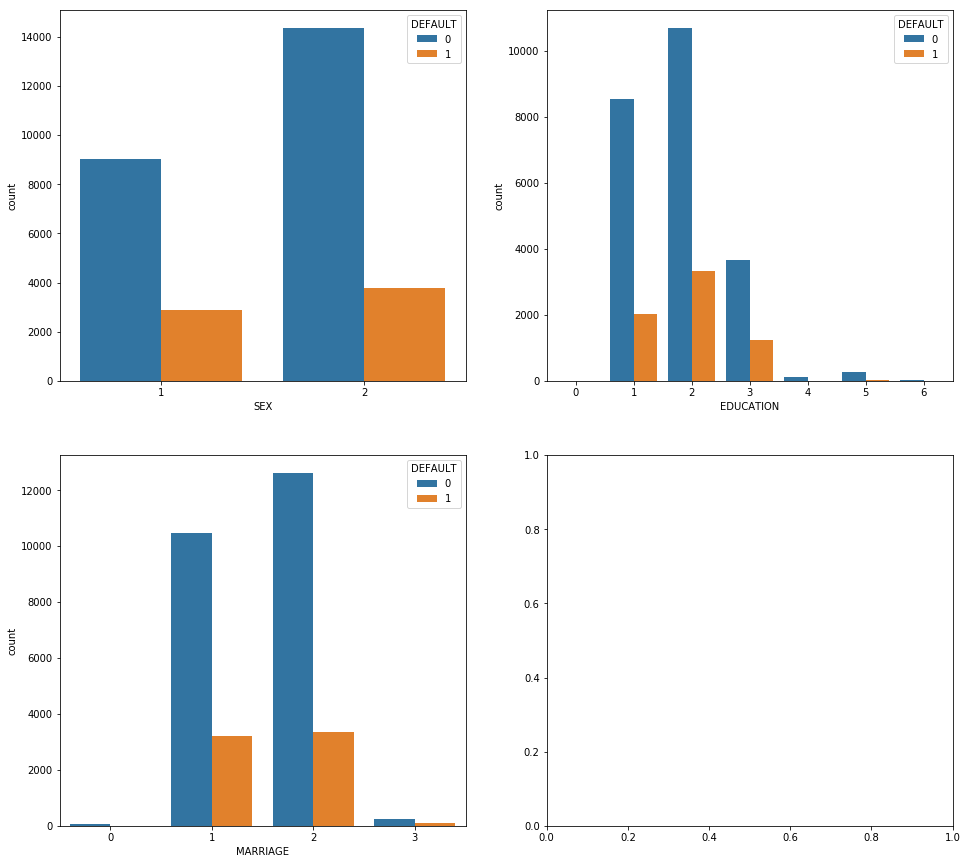

In [6]:
fig,ax = plt.subplots(2,2,figsize=(16,15))
ax = ax.flatten()
for i,col in enumerate(cat_cols):
    sns.countplot(x=col, hue='DEFAULT', data=cc, ax=ax[i])

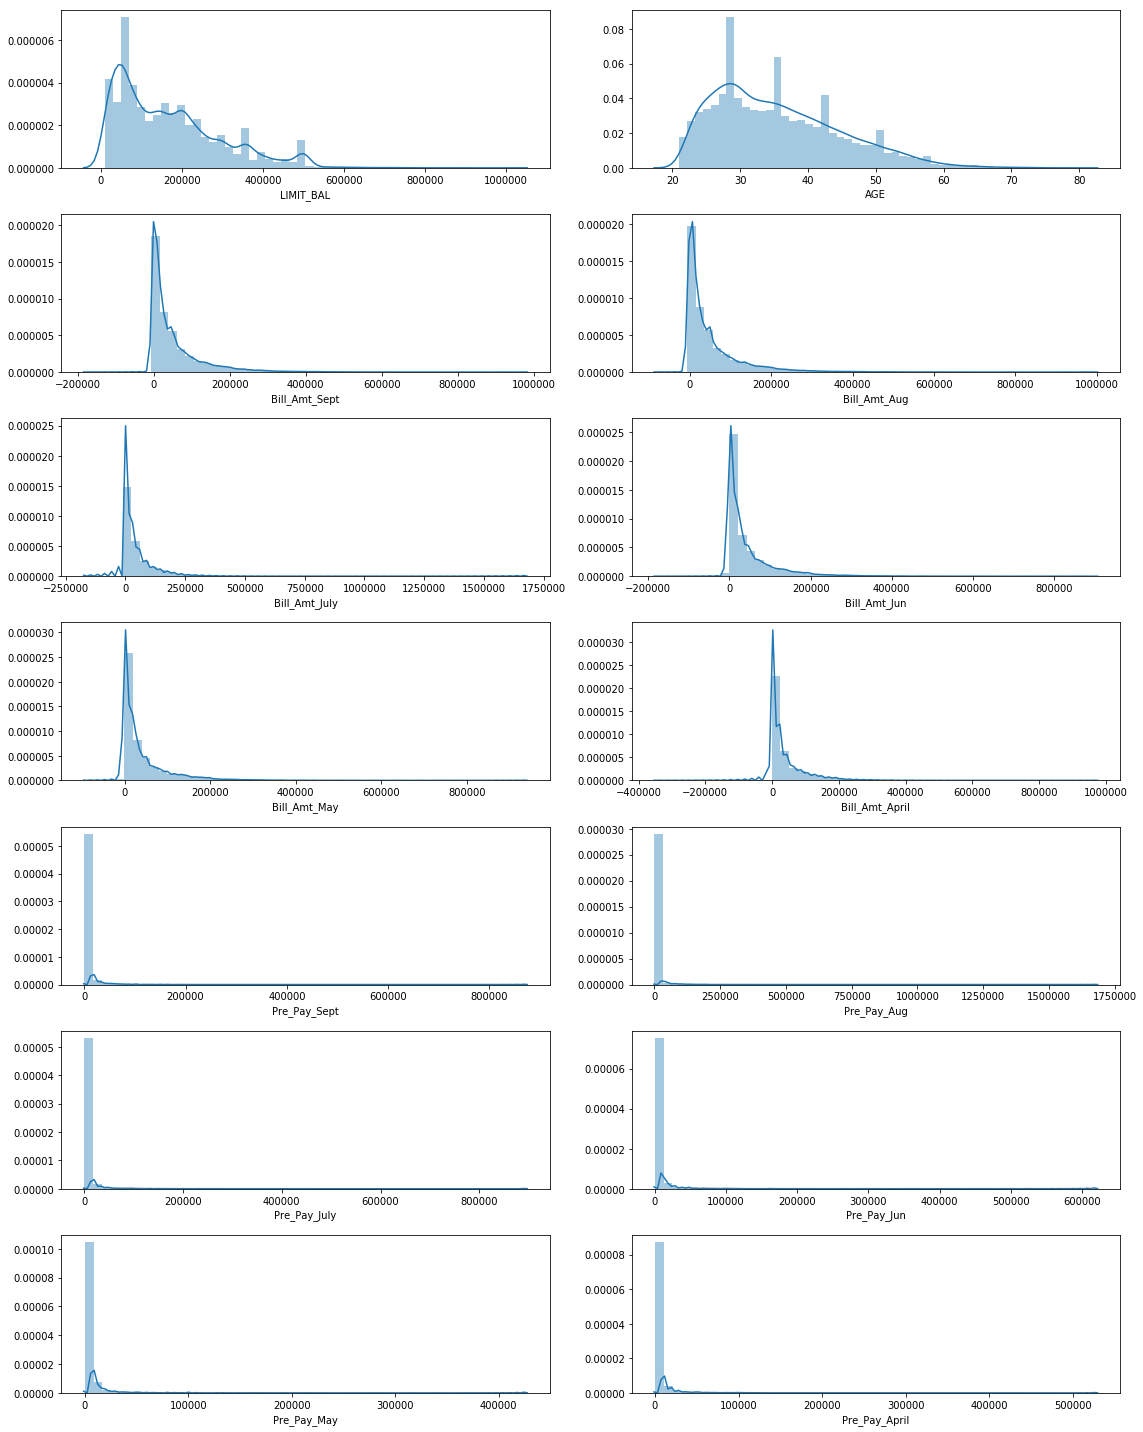

In [7]:
fig,ax = plt.subplots(7,2,figsize=(16,20))
ax = ax.flatten()
num_cols = ['LIMIT_BAL', 'AGE', 
            'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_April',
            'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April']

for i,col in enumerate(num_cols):
    sns.distplot(cc[col], ax=ax[i])
    
plt.tight_layout()
plt.show()

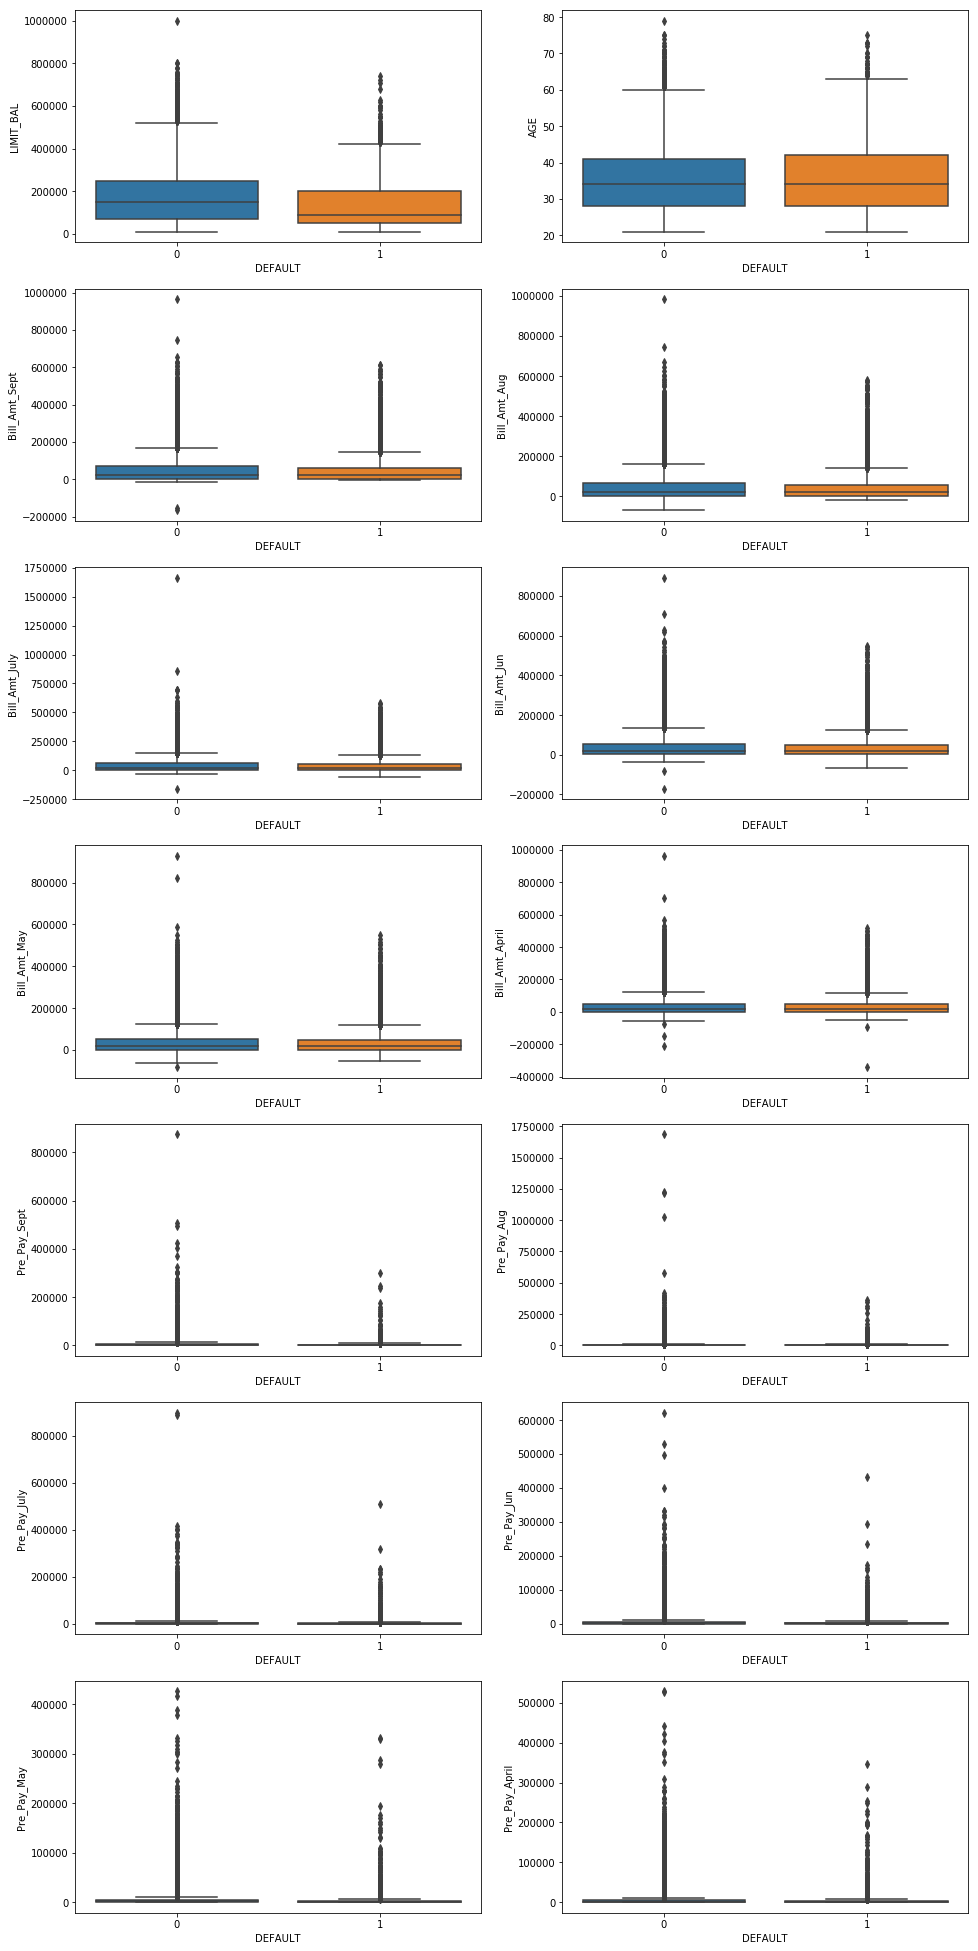

In [8]:
fig,ax = plt.subplots(7,2,figsize=(16,35))
ax=ax.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(x='DEFAULT', y=col, data=cc, ax=ax[i])
plt.show()

In [9]:
cols = ['LIMIT_BAL','DEFAULT']

for month in ['April','May','Jun','July','Aug','Sept']:
    for val in ['Pre_Pay','Repay','Bill_Amt']:
        cols.append(val+'_'+month)

cc[cols]

,LIMIT_BAL,DEFAULT,Pre_Pay_April,Repay_April,Bill_Amt_April,Pre_Pay_May,Repay_May,Bill_Amt_May,Pre_Pay_Jun,Repay_Jun,Bill_Amt_Jun,Pre_Pay_July,Repay_July,Bill_Amt_July,Pre_Pay_Aug,Repay_Aug,Bill_Amt_Aug,Pre_Pay_Sept,Repay_Sept,Bill_Amt_Sept
0,20000,1,0,-2,0,0,-2,0,0,-1,0,0,-1,689,689,2,1000,0,2,3913
1,120000,1,2000,2,3261,0,0,3455,1000,0,3272,1000,0,2682,1000,2,1725,0,-1,2682
2,90000,0,5000,0,15549,1000,0,14948,1000,0,14331,1000,0,13559,1500,0,14027,1518,0,29239
3,50000,0,1000,0,29547,1069,0,28959,1100,0,28314,1200,0,49291,2019,0,48233,2000,0,46990
4,50000,0,679,0,19131,689,0,19146,9000,0,20940,10000,-1,35835,36681,0,5670,2000,-1,8617
5,50000,0,800,0,20024,1000,0,19619,1000,0,19394,657,0,57608,1815,0,57069,2500,0,64400
6,500000,0,13770,0,473944,13750,0,483003,20239,0,542653,38000,0,445007,40000,0,412023,55000,0,367965
7,100000,0,1542,-1,567,1687,0,-159,581,0,221,0,-1,601,601,-1,380,380,0,11876
8,140000,0,1000,0,3719,1000,0,11793,1000,0,12211,432,2,12108,0,0,14096,3329,0,11285
9,20000,0,0,-1,13912,1122,-1,13007,13007,-2,0,0,-2,0,0,-2,0,0,-2,0


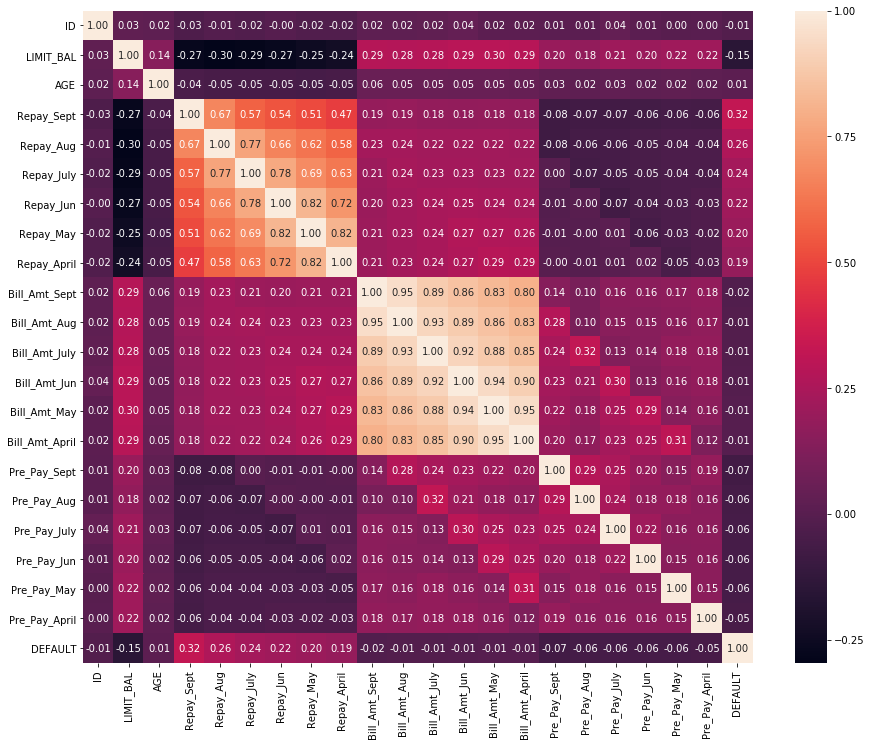

In [10]:
fig, ax  = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(cc.corr(), annot=True, fmt='.2f')
plt.show()
fig.savefig('graphs/heatmap.png')

## Hypothesis Testing

In [11]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT'],
      dtype='object')

In [12]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [13]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    
    print('Mean of grp0 =', grp0.mean())
    print('Mean of grp1 =', grp1.mean())
    print()
    
    print('Test of Normality: ')
    grp0_shapiro = stats.shapiro(grp0)
    grp1_shapiro = stats.shapiro(grp1)
    
    grp0_normal = grp0_shapiro[1] > 0.05
    grp1_normal = grp1_shapiro[1] > 0.05
    
    print('Shapiro on grp0 =', grp0_shapiro, end=' ')
    
    if grp0_normal:
        print('[grp0 follows normal distribution]')
    else:
        print('[grp0 DOES NOT follow normal distribution]')
        
    
    print('Shapiro on grp1 =', grp1_shapiro, end=' ')
    if grp1_normal:
        print('[grp1 follows normal distribution]')
    else:
        print('[grp1 DOES NOT follow normal distribution]')
    print()
    
    print('Test of Variance:')
    if grp0_normal and grp1_normal:
        print('Levene Test:')
        lev = stats.levene(grp0, grp1)
        print(lev)
        equal_variance = lev[1] > 0.05
    else:
        print('Bartlett Test:')
        bart = stats.bartlett(grp0, grp1)
        print(bart)
        equal_variance = bart[1] > 0.05
        
    if equal_variance:
        print('[Variance of grp0 and grp1 are EQUAL]')
    else:
        print('[Variance of grp0 and grp1 are NOT EQUAL]')
    print()
    
    if grp0_normal and grp1_normal and equal_variance:
        print('Parametric Test of Means:')
        ttest = stats.ttest_ind(grp0, grp1)
        print(ttest)
        rejectH0 = ttest[1] < 0.05
    else:
        print('Non-parametric Test of Means:')
        mann = stats.mannwhitneyu(grp0, grp1)
        print(mann)
        rejectH0 = mann[1] < 0.05
    
    print()
    if rejectH0:
        print('Reject H0: [Means of grp0 and grp1 are NOT EQUAL]')
    else:
        print('Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]')        
        
    print()
    print('-------------------------------------------------------------------------')
    return rejectH0

### Categorical Columns

In [14]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in cat_cols:
    chisquare_test(cc['DEFAULT'], cc[col])

H0: There is NO association between DEFAULT and SEX
Ha: There is an association between DEFAULT and SEX

SEX         1      2
DEFAULT             
0        9015  14349
1        2873   3763

chi-val = 47.70879689062111
p-val = 4.944678999412044e-12

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and EDUCATION
Ha: There is an association between DEFAULT and EDUCATION

EDUCATION   0     1      2     3    4    5   6
DEFAULT                                       
0          14  8549  10700  3680  116  262  43
1           0  2036   3330  1237    7   18   8

chi-val = 163.21655786997073
p-val = 1.2332626245415605e-32

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and MARRIAGE
Ha: There is an association between DEFAULT and MARRIAGE

MARRIAGE   0      1      2    3
DEFAULT                        
0         49  10453  12623  239
1          5   3206   3

### Repay columns

In [15]:
repay_cols = ['Repay_Sept', 'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April']

for col in repay_cols:
    repay_cut = pd.cut(cc[col], bins=[-3,0,9], labels=['<=0', '>0'])
    chisquare_test(cc['DEFAULT'], repay_cut)

H0: There is NO association between DEFAULT and Repay_Sept
Ha: There is an association between DEFAULT and Repay_Sept

Repay_Sept    <=0    >0
DEFAULT                
0           19975  3389
1            3207  3429

chi-val = 4063.187555923154
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and Repay_Aug
Ha: There is an association between DEFAULT and Repay_Aug

Repay_Aug    <=0    >0
DEFAULT               
0          21402  1962
1           4160  2476

chi-val = 3425.4792733130525
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and Repay_July
Ha: There is an association between DEFAULT and Repay_July

Repay_July    <=0    >0
DEFAULT                
0           21353  2011
1            4434  2202

chi-val = 2583.693928425119
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There

In [16]:
cc['Repay_Sept_Cut'] = cc['Repay_Sept'].clip(0,1)
cc['Repay_Aug_Cut'] = cc['Repay_Aug'].clip(0,1)
cc['Repay_July_Cut'] = cc['Repay_July'].clip(0,1)
cc['Repay_Jun_Cut'] = cc['Repay_Jun'].clip(0,1)
cc['Repay_May_Cut'] = cc['Repay_May'].clip(0,1)
cc['Repay_April_Cut'] = cc['Repay_April'].clip(0,1)

### Numerical Columns

In [17]:
num_cols = ['LIMIT_BAL', 'AGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 
            'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 
            'Pre_Pay_May', 'Pre_Pay_April']

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(cc['DEFAULT'], cc[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Rejected H0 :', reject)
print()
print('Columns Failed to Reject H0 :', not_reject)

H0: The mean of LIMIT_BAL is equal for both categories of DEFAULT
Ha: The mean of LIMIT_BAL is NOT equal for both categories of DEFAULT

Mean of grp0 = 178099.72607430234
Mean of grp1 = 130109.65641952984

Test of Normality: 
Shapiro on grp0 = (0.9197262525558472, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8549830913543701, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=170.63036533986386, pvalue=5.388772706126834e-39)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of AGE is equal for both categories of DEFAULT
Ha: The mean of AGE is NOT equal for both categories of DEFAULT

Mean of grp0 = 35.417265879130284
Mean of grp1 = 35.72573839662447

Test of Normality: 
Shapiro

### Bill Amt Sum, Pre Pay Sum

In [18]:
cc['Bill_Amt_Sum'] = cc.loc[:,'Bill_Amt_Sept':'Bill_Amt_April'].sum(axis=1)
cc['Pre_Pay_Sum'] = cc.loc[:,'Pre_Pay_Sept':'Pre_Pay_April'].sum(axis=1)

two_sample_ttest(cc['DEFAULT'], cc['Bill_Amt_Sum'])
two_sample_ttest(cc['DEFAULT'], cc['Pre_Pay_Sum'])

H0: The mean of Bill_Amt_Sum is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_Sum is NOT equal for both categories of DEFAULT

Mean of grp0 = 272428.90784968325
Mean of grp1 = 260822.63878842676

Test of Normality: 
Shapiro on grp0 = (0.7028784155845642, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6676371097564697, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=4.595451106534174, pvalue=0.03205690571907701)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=74628184.0, pvalue=1.678561587456231e-06)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_Sum is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_Sum is NOT equal for both categories of DEFAULT

Mean of grp0 = 34969.42064714946
Mean of grp1 = 19969.293701024715

Test of N

True

### Monthly Dues

In [19]:
cc['Due_Sept']=cc['Bill_Amt_Aug'] - cc['Pre_Pay_Sept']
cc['Due_Aug'] =cc['Bill_Amt_July'] - cc['Pre_Pay_Aug']
cc['Due_July']=cc['Bill_Amt_Jun'] - cc['Pre_Pay_July']
cc['Due_June']=cc['Bill_Amt_May'] - cc['Pre_Pay_Jun']
cc['Due_May'] =cc['Bill_Amt_April'] - cc['Pre_Pay_May']

In [20]:
start_idx = np.where(cc.columns=='Due_Sept')[0][0]
end_idx = np.where(cc.columns=='Due_May')[0][0] + 1
for col in cc.columns[start_idx:end_idx]:
    two_sample_ttest(cc['DEFAULT'], cc[col])

H0: The mean of Due_Sept is equal for both categories of DEFAULT
Ha: The mean of Due_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 43410.09831364492
Mean of grp1 = 43886.25693188668

Test of Normality: 
Shapiro on grp0 = (0.6885427236557007, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6577714085578918, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=2.2669725090892427, pvalue=0.13215784865694552)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=72967253.0, pvalue=9.656963426935023e-14)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Due_Aug is equal for both categories of DEFAULT
Ha: The mean of Due_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 40892.900530731036
Mean of grp1 = 41792.94921639542

Test of Normality: 
Shapiro on

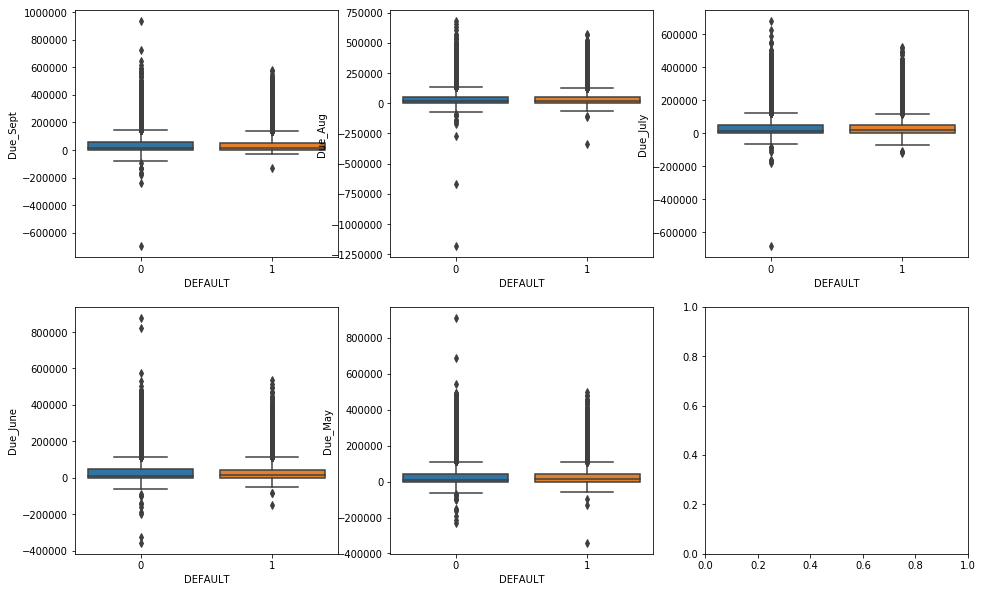

In [21]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax=ax.flatten()
sns.boxplot(x='DEFAULT',y='Due_Sept',data=cc,ax=ax[0])
sns.boxplot(x='DEFAULT',y='Due_Aug',data=cc,ax=ax[1])
sns.boxplot(x='DEFAULT',y='Due_July',data=cc,ax=ax[2])
sns.boxplot(x='DEFAULT',y='Due_June',data=cc,ax=ax[3])
sns.boxplot(x='DEFAULT',y='Due_May',data=cc,ax=ax[4])
plt.show()

### Fraction paid per month

In [22]:
cc['Fraction_Paid_Sept'] = (cc['Pre_Pay_Sept'] / cc['Bill_Amt_Aug'])
cc['Fraction_Paid_Aug'] = (cc['Pre_Pay_Aug'] / cc['Bill_Amt_July'])
cc['Fraction_Paid_July'] = (cc['Pre_Pay_July'] / cc['Bill_Amt_Jun'])
cc['Fraction_Paid_Jun'] = (cc['Pre_Pay_Jun'] / cc['Bill_Amt_May'])
cc['Fraction_Paid_May'] = (cc['Pre_Pay_May'] / cc['Bill_Amt_April'])

cc['Fraction_Paid_Total'] = (cc.loc[:,'Pre_Pay_Sept':'Pre_Pay_May'].sum(axis=1) 
                             / cc.loc[:,'Bill_Amt_Aug':'Bill_Amt_April'].sum(axis=1))

cc.loc[:,'Fraction_Paid_Sept':'Fraction_Paid_Total'] = cc.loc[:,'Fraction_Paid_Sept':'Fraction_Paid_Total'].fillna(0).clip(0,1)

In [23]:
start_idx = np.where(cc.columns=='Fraction_Paid_Sept')[0][0]
end_idx = np.where(cc.columns=='Fraction_Paid_Total')[0][0] + 1
for col in cc.columns[start_idx:end_idx]:
    two_sample_ttest(cc['DEFAULT'], cc[col])

H0: The mean of Fraction_Paid_Sept is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3247656732188412
Mean of grp1 = 0.20521348317502658

Test of Normality: 
Shapiro on grp0 = (0.6707953214645386, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5845041275024414, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=330.1054386187688, pvalue=9.116385818887772e-74)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=62412503.0, pvalue=1.0570591414780752e-132)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_Aug is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3222562280248336
Mean of grp1 =

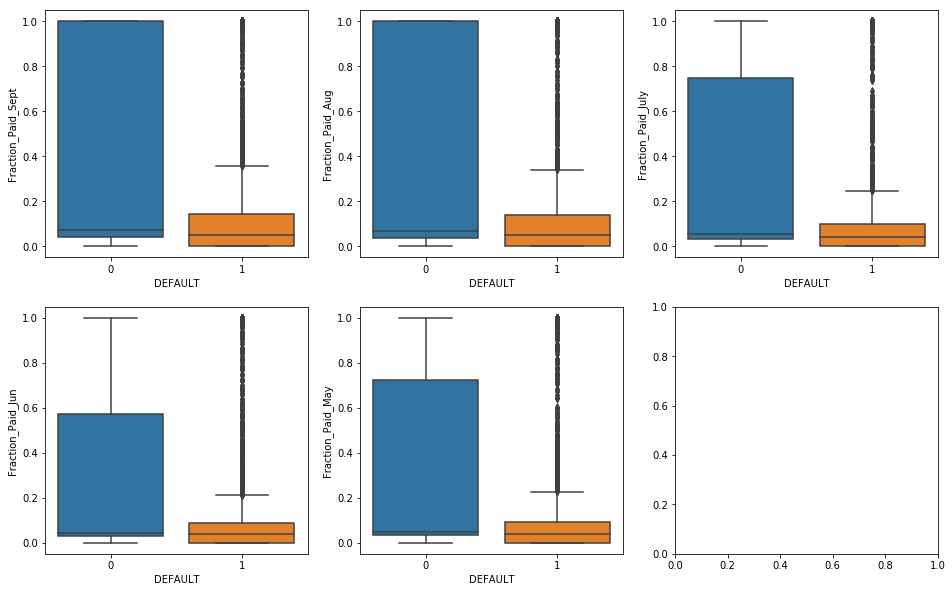

In [24]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax=ax.flatten()
sns.boxplot(x='DEFAULT',y='Fraction_Paid_Sept',data=cc,ax=ax[0])
sns.boxplot(x='DEFAULT',y='Fraction_Paid_Aug',data=cc,ax=ax[1])
sns.boxplot(x='DEFAULT',y='Fraction_Paid_July',data=cc,ax=ax[2])
sns.boxplot(x='DEFAULT',y='Fraction_Paid_Jun',data=cc,ax=ax[3])
sns.boxplot(x='DEFAULT',y='Fraction_Paid_May',data=cc,ax=ax[4])
plt.show()
fig.savefig('graphs/fraction_paid.png')

### Fraction of LIMIT BALANCE spent

In [25]:
cc['Fraction_Limit_Sept'] = cc['Bill_Amt_Sept'] / cc['LIMIT_BAL']
cc['Fraction_Limit_Aug'] = cc['Bill_Amt_Aug'] / cc['LIMIT_BAL']
cc['Fraction_Limit_July'] = cc['Bill_Amt_July'] / cc['LIMIT_BAL']
cc['Fraction_Limit_Jun'] = cc['Bill_Amt_Jun'] / cc['LIMIT_BAL']
cc['Fraction_Limit_May'] = cc['Bill_Amt_May'] / cc['LIMIT_BAL']
cc['Fraction_Limit_April'] = cc['Bill_Amt_April'] / cc['LIMIT_BAL']

In [26]:
start_idx = np.where(cc.columns=='Fraction_Limit_Sept')[0][0]
end_idx = np.where(cc.columns=='Fraction_Limit_April')[0][0] + 1
for col in cc.columns[start_idx:end_idx]:
    two_sample_ttest(cc['DEFAULT'], cc[col])

H0: The mean of Fraction_Limit_Sept is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.4048763576425393
Mean of grp1 = 0.490297215157841

Test of Normality: 
Shapiro on grp0 = (0.841924786567688, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.878785252571106, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=3.369711883390951, pvalue=0.06640536757506277)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=69653897.5, pvalue=6.422882044989897e-37)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_Aug is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3897751886137699
Mean of grp1 = 0.48629

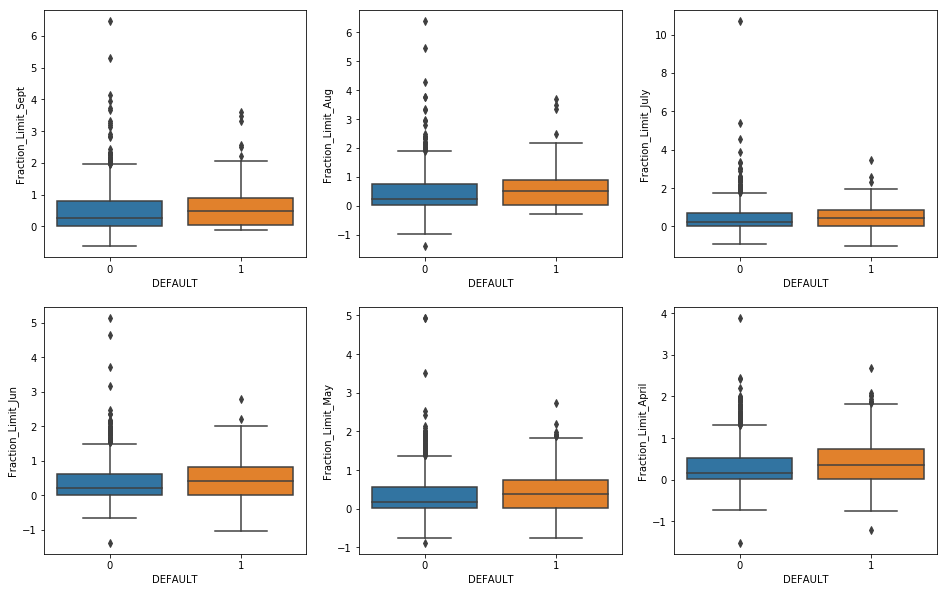

In [27]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax=ax.flatten()
sns.boxplot(x='DEFAULT',y='Fraction_Limit_Sept',data=cc,ax=ax[0])
sns.boxplot(x='DEFAULT',y='Fraction_Limit_Aug',data=cc,ax=ax[1])
sns.boxplot(x='DEFAULT',y='Fraction_Limit_July',data=cc,ax=ax[2])
sns.boxplot(x='DEFAULT',y='Fraction_Limit_Jun',data=cc,ax=ax[3])
sns.boxplot(x='DEFAULT',y='Fraction_Limit_May',data=cc,ax=ax[4])
sns.boxplot(x='DEFAULT',y='Fraction_Limit_April',data=cc,ax=ax[5])
plt.show()
fig.savefig('graphs/fraction_limit.png')

### Number Months of Late Payment

In [28]:
cc['Num_Late_Payments'] = cc.loc[:,'Repay_Sept':'Repay_April'].clip(0,1).sum(axis=1)
two_sample_ttest(cc['DEFAULT'], cc['Num_Late_Payments'])

H0: The mean of Num_Late_Payments is equal for both categories of DEFAULT
Ha: The mean of Num_Late_Payments is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.5041944872453347
Mean of grp1 = 1.9960819770946354

Test of Normality: 
Shapiro on grp0 = (0.5023685097694397, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8193399906158447, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=4706.017625331034, pvalue=0.0)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=42465114.0, pvalue=0.0)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


True

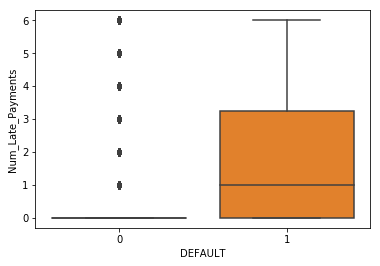

In [29]:
fig,ax = plt.subplots(1,1)
sns.boxplot(x='DEFAULT',y='Num_Late_Payments',data=cc)
plt.show()
fig.savefig('graphs/num_late.png')

Next Steps:
- Variable Transformation
- Dimensionalty Reduction
- Outlier Identification and Treatment
- Baseline Model
- Ensemble Methods
- Evaluation Metrics

In [30]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT', 'Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut',
       'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut', 'Bill_Amt_Sum',
       'Pre_Pay_Sum', 'Due_Sept', 'Due_Aug', 'Due_July', 'Due_June', 'Due_May',
       'Fraction_Paid_Sept', 'Fraction_Paid_Aug', 'Fraction_Paid_July',
       'Fraction_Paid_Jun', 'Fraction_Paid_May', 'Fraction_Paid_Total',
       'Fraction_Limit_Sept', 'Fraction_Limit_Aug', 'Fraction_Limit_July',
       'Fraction_Limit_Jun', 'Fraction_Limit_May', 'Fraction_Limit_April',
       'Num_Late_Payments'],
      dtype='object')

In [31]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
num_cols = ['LIMIT_BAL', 'AGE']
repay_cols = ['Repay_Sept', 'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April']
bill_amt_cols = ['Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_April']
pre_pay_cols = ['Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April']

repay_cut_cols = ['Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut', 'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut']
sum_cols = ['Bill_Amt_Sum', 'Pre_Pay_Sum']
due_cols = ['Due_Sept', 'Due_Aug', 'Due_July', 'Due_June', 'Due_May']
fraction_paid_cols = ['Fraction_Paid_Sept', 'Fraction_Paid_Aug', 'Fraction_Paid_July', 
                      'Fraction_Paid_Jun', 'Fraction_Paid_May', 'Fraction_Paid_Total']
fraction_limit_cols = ['Fraction_Limit_Sept', 'Fraction_Limit_Aug', 'Fraction_Limit_July',
                       'Fraction_Limit_Jun', 'Fraction_Limit_May', 'Fraction_Limit_April']

## Train Test Split

In [32]:
X = cc.drop(columns=['ID', 'DEFAULT'])
y = cc['DEFAULT']

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

## Undersampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state=0)

X_resampled, y_resampled, idx_resampled = rus.fit_sample(Xtrain, ytrain)

X_resampled = pd.DataFrame(X_resampled, columns=Xtrain.columns, index=idx_resampled)
y_resampled = pd.Series(y_resampled, name='DEFAULT')

for col in Xtrain.columns:
    X_resampled[col] = X_resampled[col].astype(Xtrain[col].dtype)

Using TensorFlow backend.


In [35]:
print(Xtrain.shape)
print()
print(X_resampled.shape)

(24000, 49)

(10618, 49)


In [36]:
print(ytrain.value_counts(normalize=True))
print()
print(y_resampled.value_counts(normalize=True))

0    0.778792
1    0.221208
Name: DEFAULT, dtype: float64

1    0.5
0    0.5
Name: DEFAULT, dtype: float64


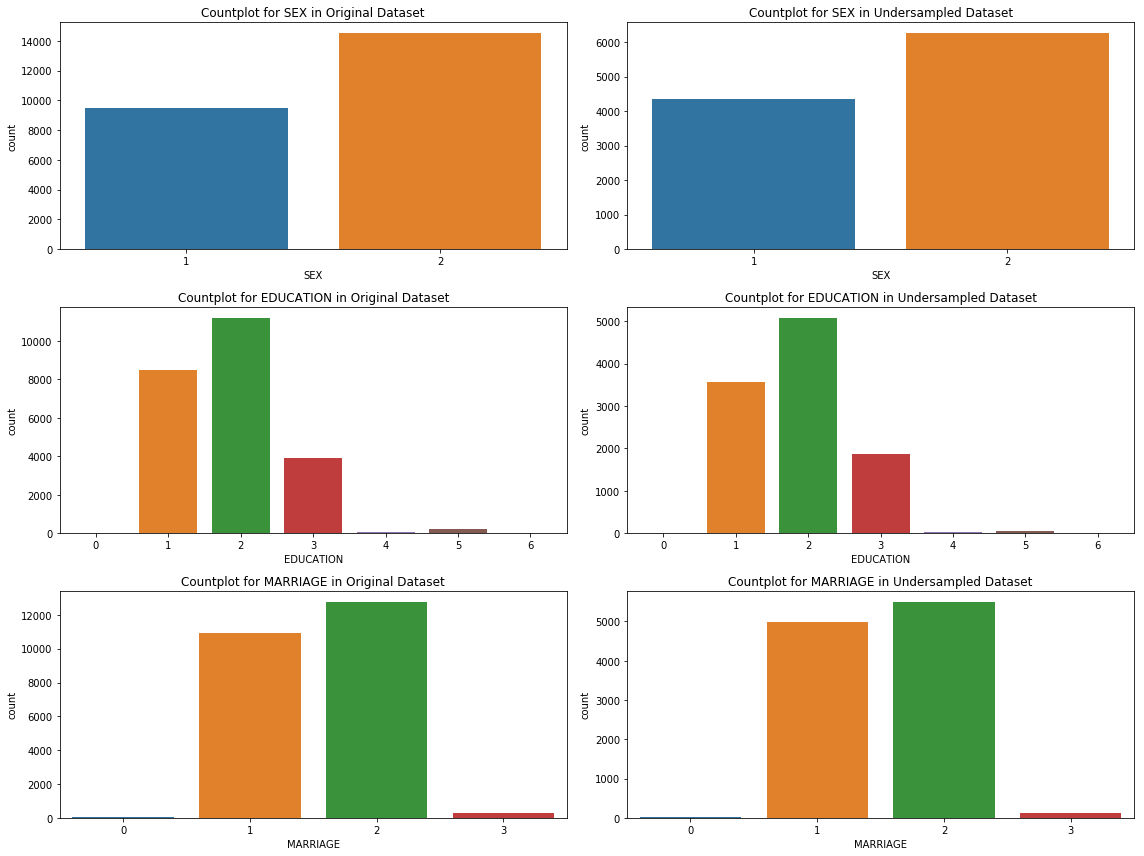

In [37]:
fig,ax = plt.subplots(3,2,figsize=(16,12))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(Xtrain[col], ax=ax[2*i])
    sns.countplot(X_resampled[col], ax=ax[2*i + 1])
    ax[2*i].set_title('Countplot for ' + col + ' in Original Dataset')
    ax[2*i+1].set_title('Countplot for ' + col + ' in Undersampled Dataset')
    
plt.tight_layout()
plt.show()
#fig.savefig('graphs/undersampling-categorical.png')

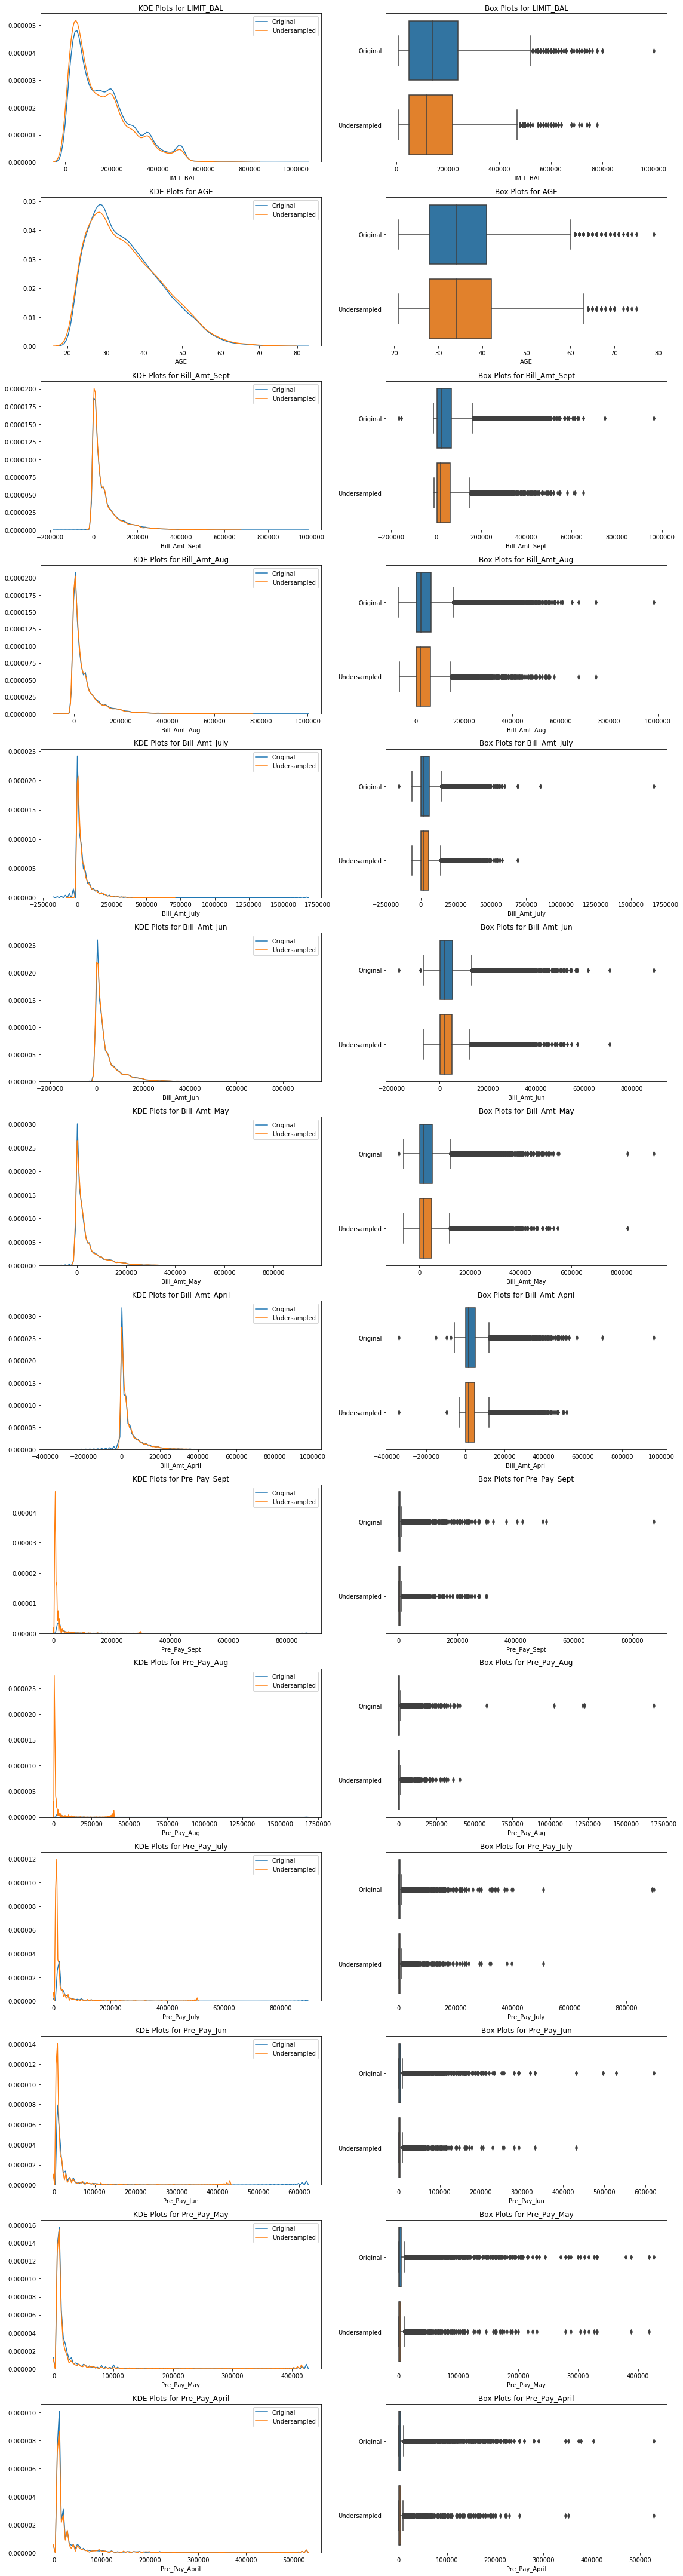

In [38]:
fig,ax = plt.subplots(14,2,figsize=(16,60))
ax = ax.flatten()

for i, col in enumerate(num_cols + bill_amt_cols + pre_pay_cols):
    sns.kdeplot(Xtrain[col], label='Original', ax=ax[2*i])
    sns.kdeplot(X_resampled[col], label='Undersampled', ax=ax[2*i])
    ax[2*i].set_xlabel(col)
    ax[2*i].set_title('KDE Plots for ' + col)
    
    sns.boxplot(x=pd.concat([Xtrain[col], X_resampled[col]]), 
                y=['Original']*len(Xtrain) + ['Undersampled']*len(X_resampled), ax=ax[2*i+1])
    ax[2*i+1].set_title('Box Plots for ' + col)
    
    
plt.tight_layout()
plt.show()
#fig.savefig('graphs/undersampling-numerical.png')

In [39]:
Xtrain, ytrain = X_resampled, y_resampled

## Scaling

In [40]:
scale_columns = num_cols + bill_amt_cols + pre_pay_cols + sum_cols + due_cols

sc = StandardScaler()
Xtrain[scale_columns] = sc.fit_transform(Xtrain[scale_columns])
Xtest[scale_columns] = sc.transform(Xtest[scale_columns])

## Base Model

In [41]:
def fit_and_evaluate(model, Xtrain, Xtest, ytrain, ytest, display=True):
    model.fit(Xtrain, ytrain)
    
    ypred = model.predict(Xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)
    precision = metrics.precision_score(ytest, ypred)
    recall = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    ck = metrics.cohen_kappa_score(ytest, ypred)
    lloss = metrics.log_loss(ytest, ypred)
    
    yprob = model.predict_proba(Xtest)
    roc_auc = metrics.roc_auc_score(ytest,yprob[:,1])

    if display:
        print('Training score =', model.score(Xtrain, ytrain))
        print('Test score =', model.score(Xtest, ytest))
        print()
        
        # scores
        print('Accuracy =', accuracy)
        print('Precision =', precision)
        print('Recall =', recall)
        print('F1 Score =', f1)
        print('Cohen Kappa Score =', ck)
        print('Log Loss =', lloss)
        print()
        
        fig,ax = plt.subplots(1,2,figsize=(16,5))
        ax = ax.flatten()
        
        # confusion matrix
        cm = metrics.confusion_matrix(ytest, ypred)
        sns.heatmap(cm, annot=True, fmt='d', ax = ax[0])
        
        # ROC curve
        fpr,tpr,threshold = metrics.roc_curve(ytest,yprob[:,1])
        lw = 2
        plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
        plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        
    else:
        return accuracy, precision, recall, f1, roc_auc, ck, lloss

### Original Columns

Training score = 0.6745149745714824
Test score = 0.6878333333333333

Accuracy = 0.6878333333333333
Precision = 0.37909654561558903
Recall = 0.6450640542577242
F1 Score = 0.4775453277545328
Cohen Kappa Score = 0.27577457578228326
Log Loss = 10.782041537210807



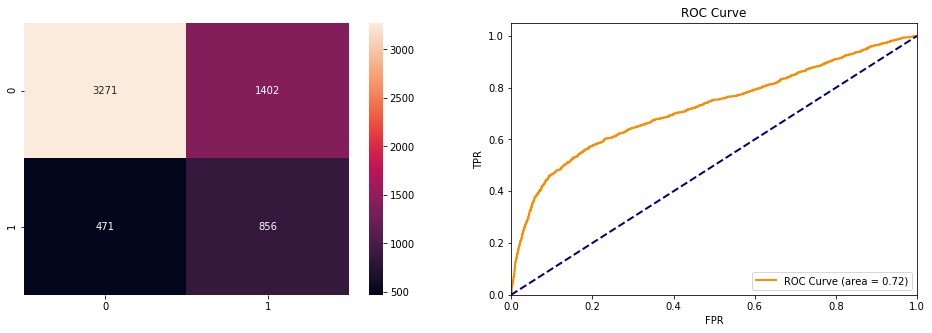

In [42]:
cols = cat_cols + num_cols + repay_cols + bill_amt_cols + pre_pay_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### With Repay Cut

Training score = 0.6998493124882276
Test score = 0.7701666666666667

Accuracy = 0.7701666666666667
Precision = 0.4836888331242158
Recall = 0.5810097965335342
F1 Score = 0.5279014036288942
Cohen Kappa Score = 0.3776853022114811
Log Loss = 7.938271786211147



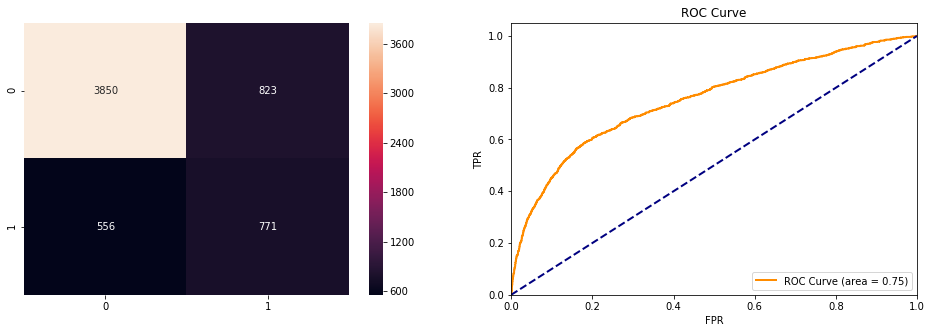

In [43]:
cols = cat_cols + num_cols + repay_cut_cols + bill_amt_cols + pre_pay_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### Bill Amt, Pre Pay Sum

Training score = 0.6998493124882276
Test score = 0.772

Accuracy = 0.772
Precision = 0.48713119899560575
Recall = 0.584777694046722
F1 Score = 0.5315068493150685
Cohen Kappa Score = 0.3824939750280202
Log Loss = 7.874949896556381



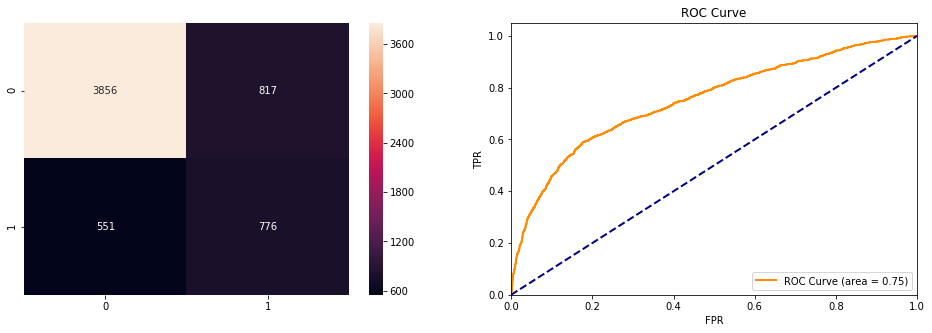

In [44]:
cols = cat_cols + num_cols + repay_cut_cols + sum_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### Monthly Dues

Training score = 0.7001318515728009
Test score = 0.7705

Accuracy = 0.7705
Precision = 0.484394506866417
Recall = 0.584777694046722
F1 Score = 0.5298736770228747
Cohen Kappa Score = 0.37983644255808235
Log Loss = 7.926759260544893



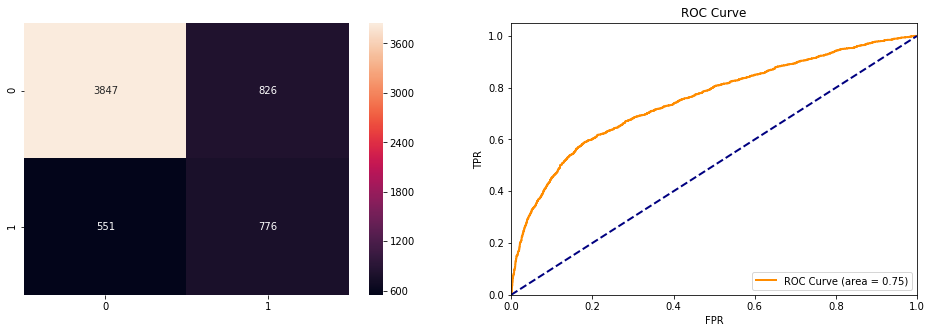

In [45]:
cols = cat_cols + num_cols + repay_cut_cols + due_cols + sum_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### Fraction Paid

Training score = 0.6992842343190808
Test score = 0.7726666666666666

Accuracy = 0.7726666666666666
Precision = 0.48834278512917456
Recall = 0.5840241145440844
F1 Score = 0.5319148936170213
Cohen Kappa Score = 0.38336821100380325
Log Loss = 7.851923379295249



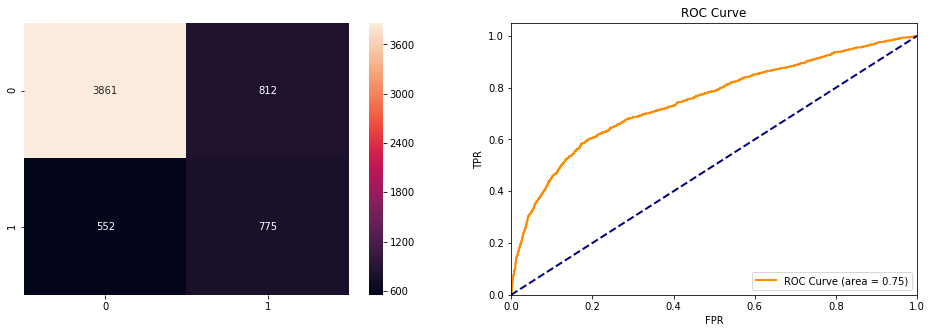

In [46]:
cols = cat_cols + num_cols + repay_cut_cols + fraction_paid_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### Fraction Limit

Training score = 0.6977773592013562
Test score = 0.7685

Accuracy = 0.7685
Precision = 0.48067331670822944
Recall = 0.5810097965335342
F1 Score = 0.526100307062436
Cohen Kappa Score = 0.37474604215895224
Log Loss = 7.995837746198381



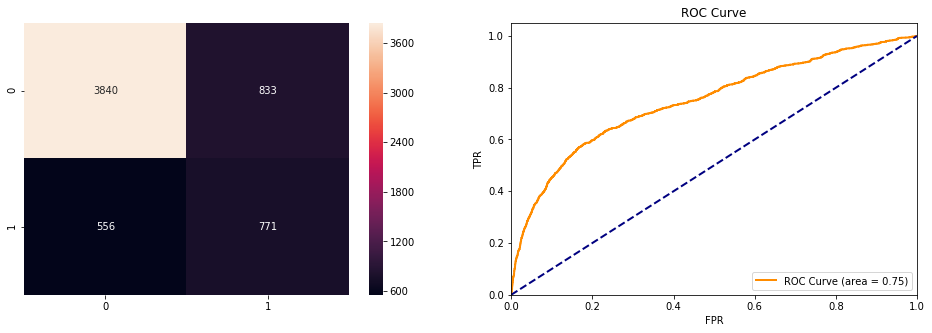

In [47]:
cols = cat_cols + num_cols + repay_cut_cols + fraction_paid_cols + fraction_limit_cols

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

### Num Late Payments

Training score = 0.6992842343190808
Test score = 0.7723333333333333

Accuracy = 0.7723333333333333
Precision = 0.48774355751099935
Recall = 0.584777694046722
F1 Score = 0.5318711446196024
Cohen Kappa Score = 0.38308617388931043
Log Loss = 7.863436704558934



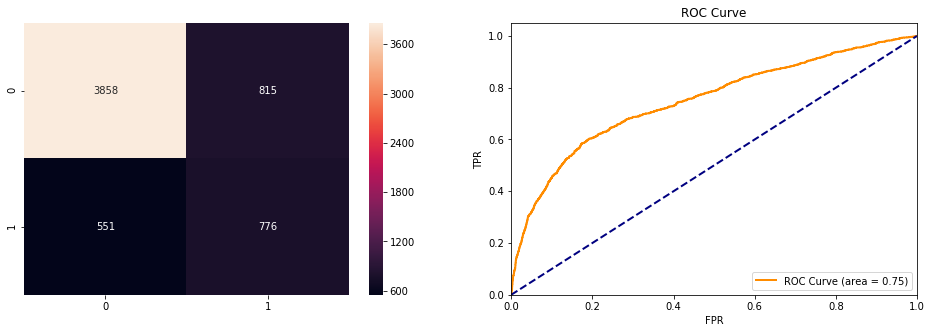

In [48]:
cols = cat_cols + num_cols + repay_cut_cols + fraction_paid_cols + ['Num_Late_Payments']

fit_and_evaluate(LogisticRegression(), Xtrain[cols], Xtest[cols], ytrain, ytest)

## Compare Models

In [50]:
def compare_models(models, Xtrain, Xtest, ytrain, ytest):
    scores = {}
    for item in models.items():
        name = item[0]
        model = item[1]
        scores[name] = fit_and_evaluate(model, Xtrain, Xtest, ytrain, ytest, display=False)
    
    return pd.DataFrame(scores,
                        index = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Cohen Kappa Score', 'Log Loss']
                       ).T 

In [51]:
def compare_roc_curves(models, Xtrain, Xtest, ytrain, ytest, save_name=None):
    fig = plt.figure(figsize=(12,9))
    lw = 2    
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves')
    
    for item in models.items():
        name = item[0]
        model = item[1]
        
        model.fit(Xtrain, ytrain)
        yprob = model.predict_proba(Xtest)
        fpr,tpr,threshold = metrics.roc_curve(ytest,yprob[:,1])
        plt.plot(fpr, tpr, lw=lw, label=name)
        
    plt.legend(loc='lower right')
    plt.show()
    
    if save_name:
        fig.savefig(save_name)

In [52]:
# cols = cat_cols + num_cols + repay_cut_cols + fraction_paid_cols + ['Num_Late_Payments']
# cols = cat_cols + num_cols + repay_cols + bill_amt_cols + pre_pay_cols

models = {'Logsitic Regression': LogisticRegression(), 
          'Decision Trees': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 
          'KNN': KNeighborsClassifier(),
          'Naive Bayes': GaussianNB()}

In [53]:
compare_models(models, Xtrain, Xtest, ytrain, ytest)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen Kappa Score,Log Loss
Logsitic Regression,0.765833,0.475896,0.580256,0.522920,0.756453,0.369759,8.087943
Decision Trees,0.623667,0.321716,0.633007,0.426612,0.627011,0.188665,12.998329
Random Forest,0.727333,0.419152,0.603617,0.494750,0.746012,0.316254,9.417721
KNN,0.674667,0.369302,0.665411,0.474987,0.722627,0.266271,11.236816
Naive Bayes,0.746333,0.444508,0.588546,0.506485,0.729464,0.340217,8.761466


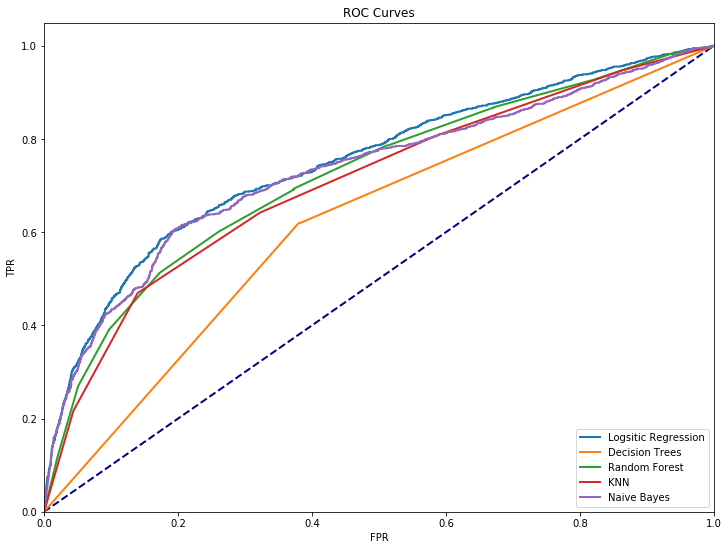

In [54]:
compare_roc_curves(models, Xtrain[cols], Xtest[cols], ytrain, ytest, 'graphs/roc.png')

## Classification with Paramter Tuning

- Decision Tree
- Random Forest
- Extra Trees
- AdaBoost
- Catboost

In [48]:
def plot_cv_scores(scores, values, yl, xl):
    fig, ax = plt.subplots(figsize=(14,6))
    plt.boxplot(scores)
    ax.set_xticklabels(values)
    plt.ylabel(yl)
    plt.xlabel(xl)
    plt.show()

### Decision Trees

#### Criterion

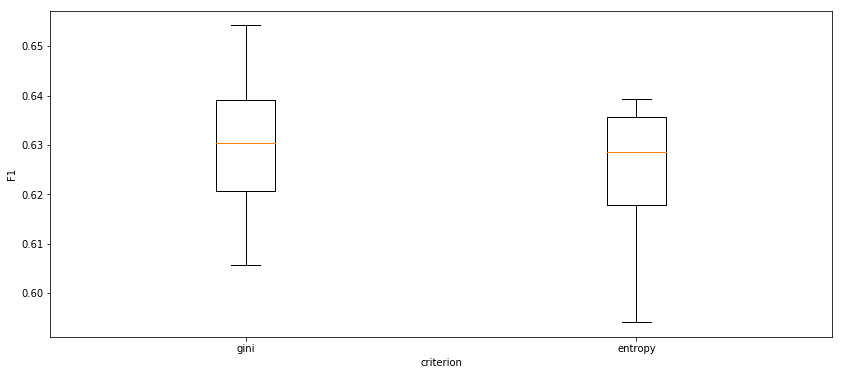

In [49]:
arr = ['gini','entropy']
scores = []

for a in arr:
    dt = DecisionTreeClassifier(criterion=a)
    score = cross_val_score(dt, Xtrain, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1', 'criterion')

#### Max Depth

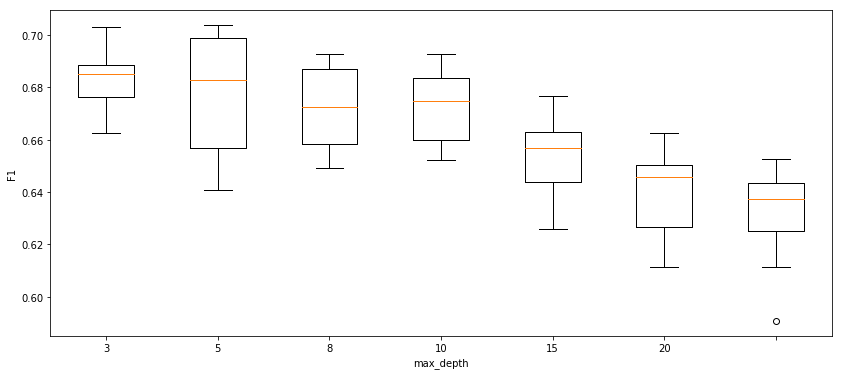

In [50]:
arr = [3, 5, 8, 10, 15, 20, None]
scores = []

for a in arr:
    dt = DecisionTreeClassifier(max_depth=a)
    score = cross_val_score(dt, Xtrain, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1', 'max_depth')

#### Min Samples Split

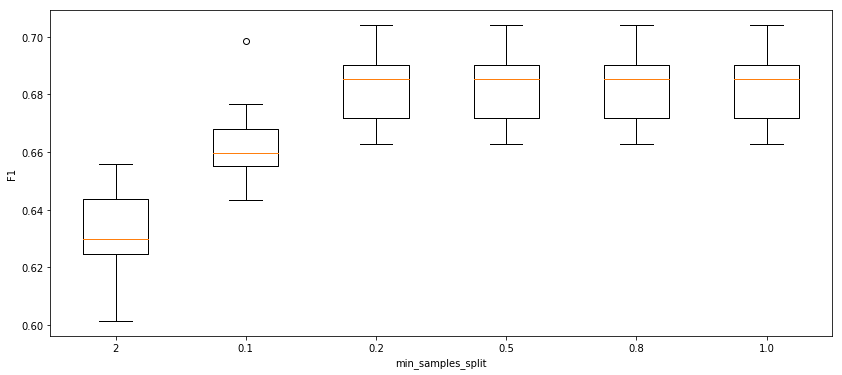

In [51]:
arr = [2,0.1,0.2,0.5,0.8,1.0]
scores = []

for a in arr:
    dt = DecisionTreeClassifier(min_samples_split=a)
    score = cross_val_score(dt, Xtrain, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1', 'min_samples_split')

#### Min Samples Leaf

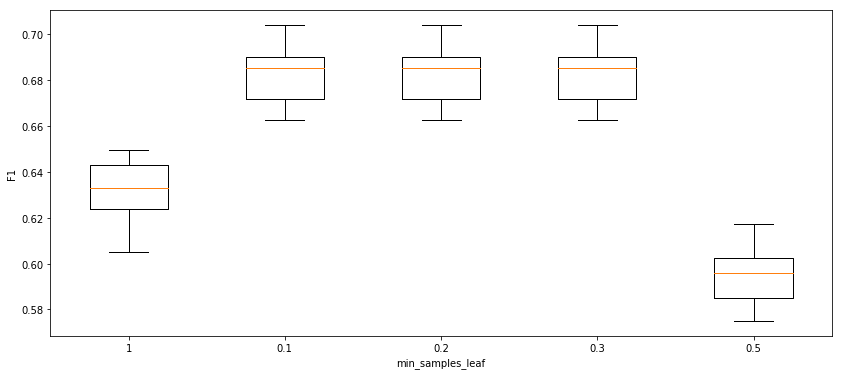

In [52]:
arr = [1,0.1,0.2,0.3,0.5]
scores = []

for a in arr:
    dt = DecisionTreeClassifier(min_samples_leaf=a)
    score = cross_val_score(dt, Xtrain, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1', 'min_samples_leaf')

#### Max Features

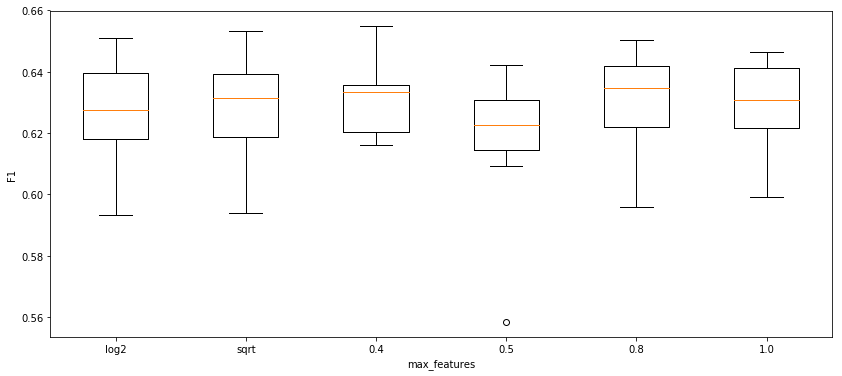

In [53]:
arr = ['log2','sqrt',0.4,0.5,0.8,1.0]
scores = []

for a in arr:
    dt = DecisionTreeClassifier(max_features=a)
    score = cross_val_score(dt, Xtrain, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1', 'max_features')

#### GridSearch

In [54]:
params = {'criterion': ['gini','entropy'],
          'max_depth': [3,5],
          'min_samples_split': [0.5,0.8],
          'min_samples_leaf': [0.2,0.3],
          'max_features': ['sqrt',0.4,0.5],
          'max_leaf_nodes': [2,5]
         }

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, params, cv=10, n_jobs=4, verbose=1)
dt_grid.fit(Xtrain,ytrain)

print(dt_grid.best_params_)
print()

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   40.0s


{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': 2, 'min_samples_leaf': 0.3, 'min_samples_split': 0.8}



[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   48.4s finished


Training score = 0.6987191561499341
Test score = 0.7323333333333333

Accuracy = 0.7323333333333333
Precision = 0.4299347061778001
Recall = 0.6450640542577242
F1 Score = 0.5159734779987944
Cohen Kappa Score = 0.3410780144210642
Log Loss = 9.245030405551638



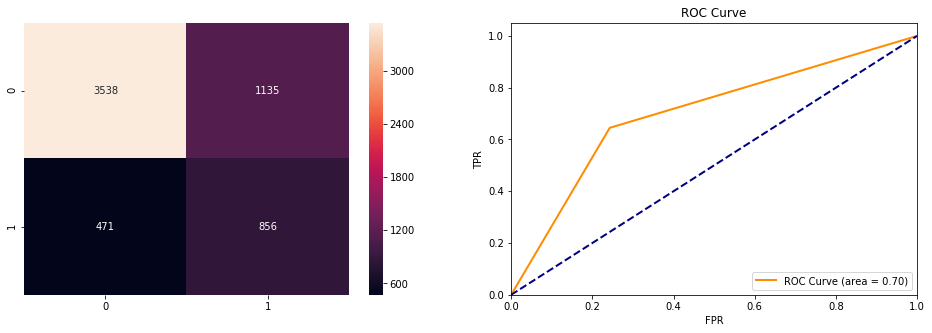

In [55]:
dt_best = dt_grid.best_estimator_
fit_and_evaluate(dt_best, Xtrain, Xtest, ytrain, ytest)

In [56]:
pd.DataFrame({'Feature':Xtrain.columns, 
              'Importance':dt_best.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
48,Num_Late_Payments,1.0
25,Repay_July_Cut,0.0
27,Repay_May_Cut,0.0
28,Repay_April_Cut,0.0
29,Bill_Amt_Sum,0.0
30,Pre_Pay_Sum,0.0
31,Due_Sept,0.0
32,Due_Aug,0.0
33,Due_July,0.0
34,Due_June,0.0


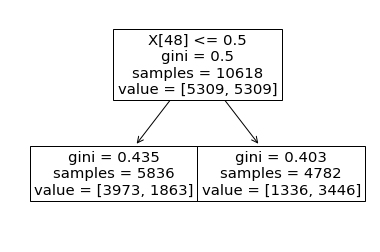

In [57]:
plot_tree(dt_best)
plt.show()

### Random Forest

#### N Estimators

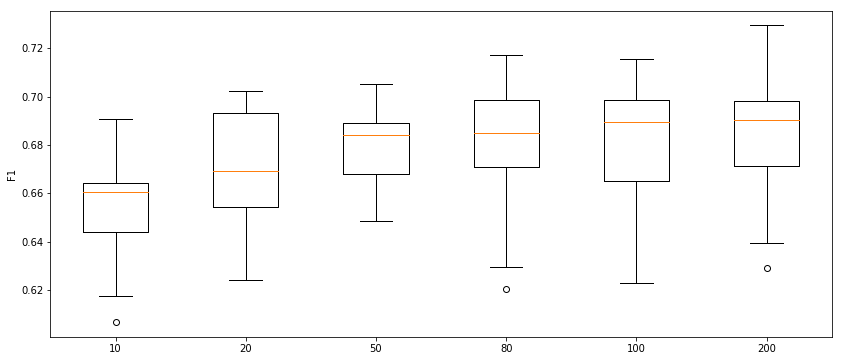

In [115]:
arr = [10,20,50,80,100,200]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Criterion

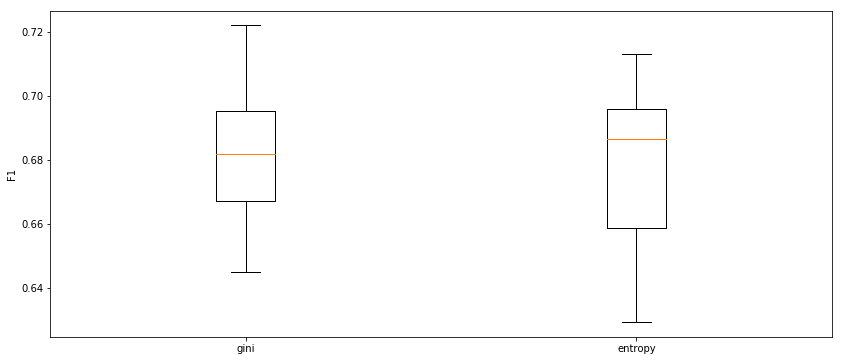

In [116]:
arr = ['gini','entropy']
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=50, criterion=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Depth

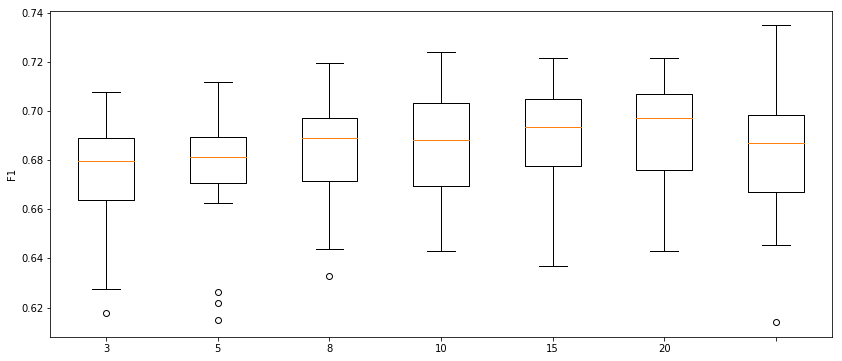

In [117]:
arr = [3, 5, 8, 10, 15, 20, None]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=50, max_depth=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Split

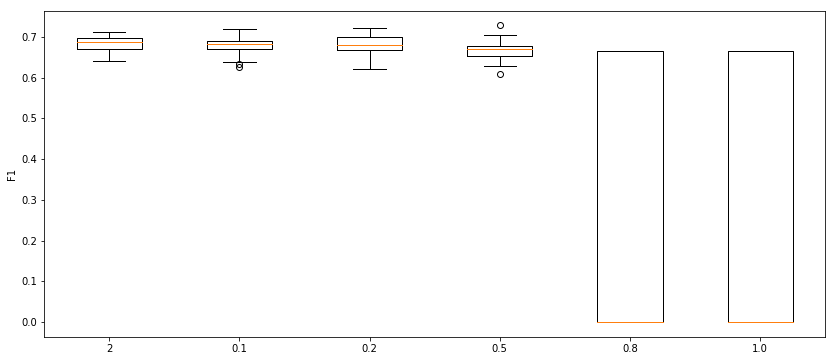

In [118]:
arr = [2,0.1,0.2,0.5,0.8,1.0]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=50, min_samples_split=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Leaf

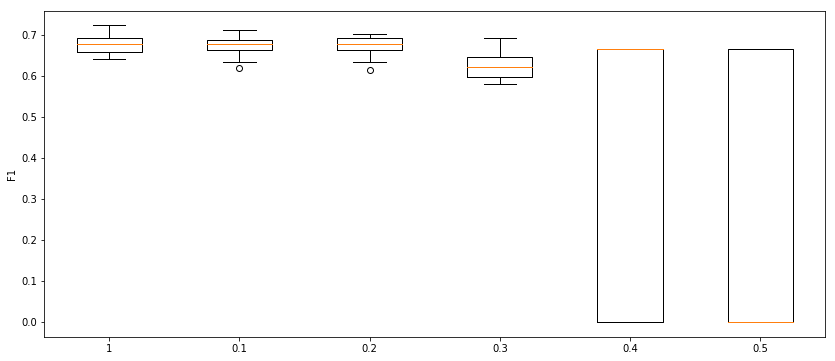

In [121]:
arr = [1,0.1,0.2,0.3,0.4,0.5]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=50, min_samples_leaf=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Features

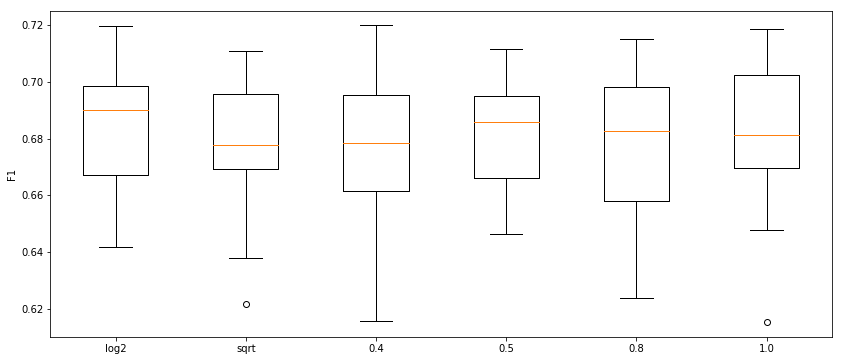

In [120]:
arr = ['log2','sqrt',0.4,0.5,0.8,1.0]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=50, max_features=a)
    score = cross_val_score(rf, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### GridSearch

In [124]:
params = {'criterion': ['gini','entropy'],
          'max_depth': [5,8,20],
          'min_samples_split': [2,0.1],
          'min_samples_leaf': [1,0.1],
          'max_features': ['log2',0.5,1.0]
         }

rf = RandomForestClassifier(n_jobs=4, n_estimators=50)
rf_grid = GridSearchCV(rf, params, cv=20, verbose=1, n_jobs=4)
rf_grid.fit(Xtrain,ytrain)

print(rf_grid.best_params_)
print()

Fitting 20 folds for each of 72 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 12.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 29.5min finished


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}



Training score = 0.7207572047466566
Test score = 0.7646666666666667

Accuracy = 0.7646666666666667
Precision = 0.4753908511870295
Recall = 0.6186887716654107
F1 Score = 0.5376555337262607
Cohen Kappa Score = 0.3834304352768618
Log Loss = 8.128246117480941



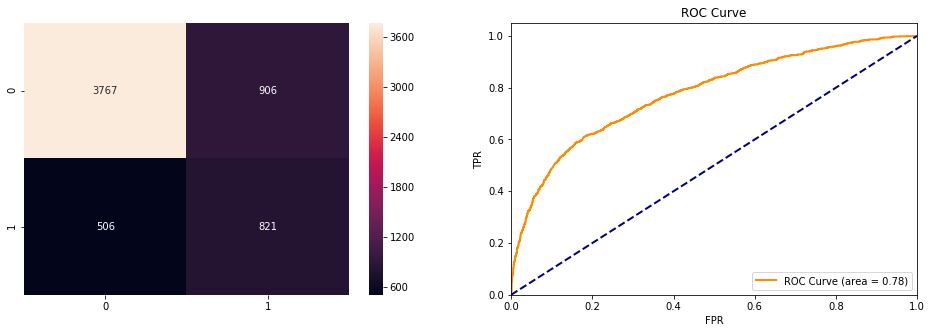

In [171]:
rf_best = rf_grid.best_estimator_
fit_and_evaluate(rf_best, Xtrain, Xtest, ytrain, ytest)

In [172]:
pd.DataFrame({'Feature':Xtrain.columns, 
              'Importance':rf_best.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
48,Num_Late_Payments,0.165117
23,Repay_Sept_Cut,0.115713
5,Repay_Sept,0.112307
6,Repay_Aug,0.086946
24,Repay_Aug_Cut,0.079180
25,Repay_July_Cut,0.060341
26,Repay_Jun_Cut,0.037459
30,Pre_Pay_Sum,0.028987
7,Repay_July,0.020930
9,Repay_May,0.020702


### Extra Trees

#### N Estimators

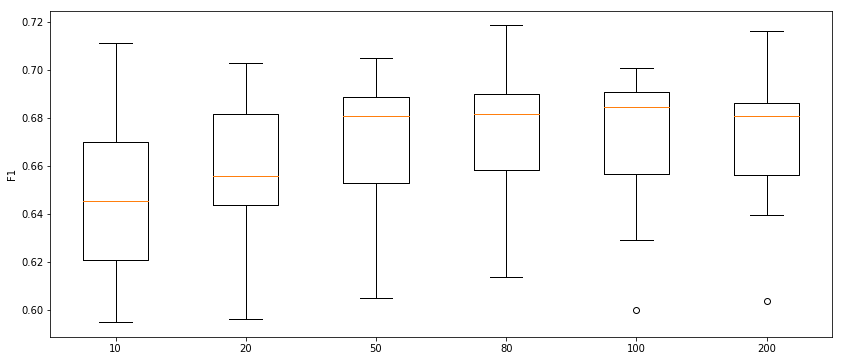

In [129]:
arr = [10,20,50,80,100,200]
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Criterion

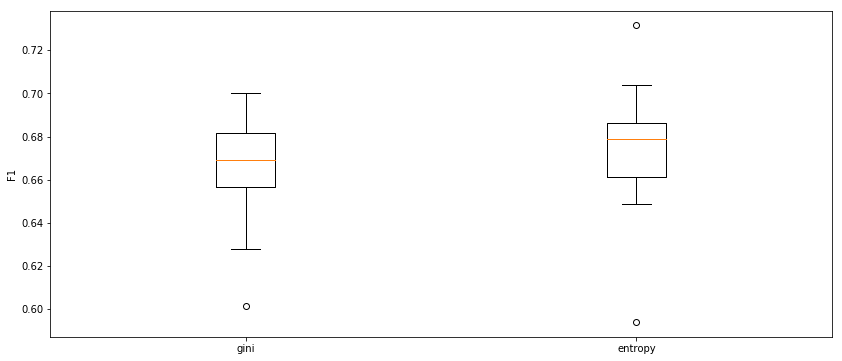

In [130]:
arr = ['gini','entropy']
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Depth

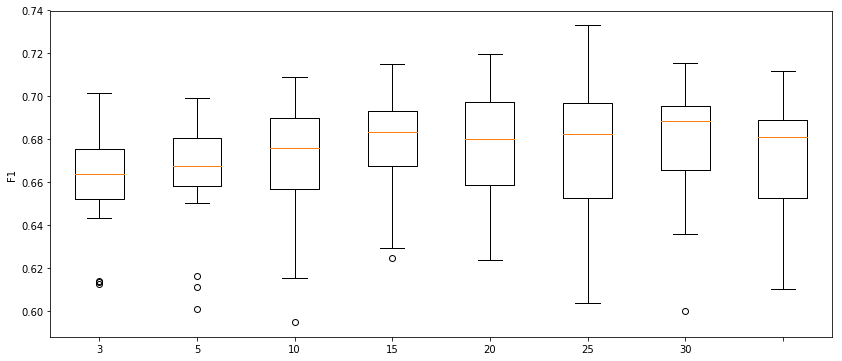

In [134]:
arr = [3, 5, 10, 15, 20, 25, 30, None]
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion='entropy', max_depth=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Split

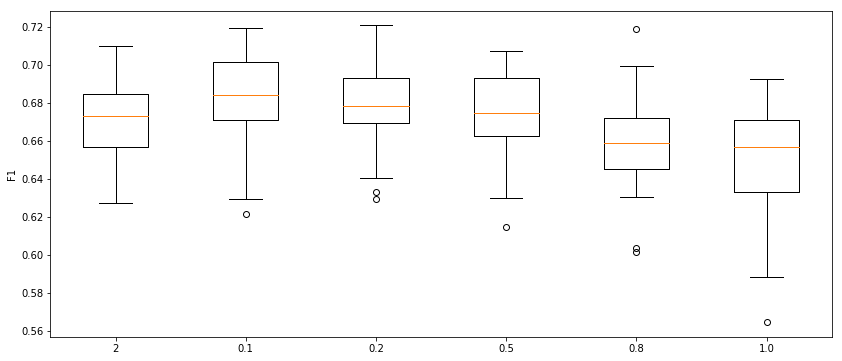

In [135]:
arr = [2,0.1,0.2,0.5,0.8,1.0]
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion='entropy', min_samples_split=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Leaf

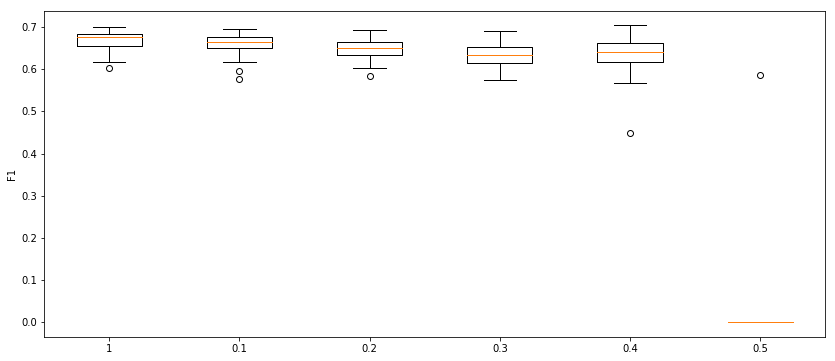

In [136]:
arr = [1,0.1,0.2,0.3,0.4,0.5]
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion='entropy', min_samples_leaf=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Features

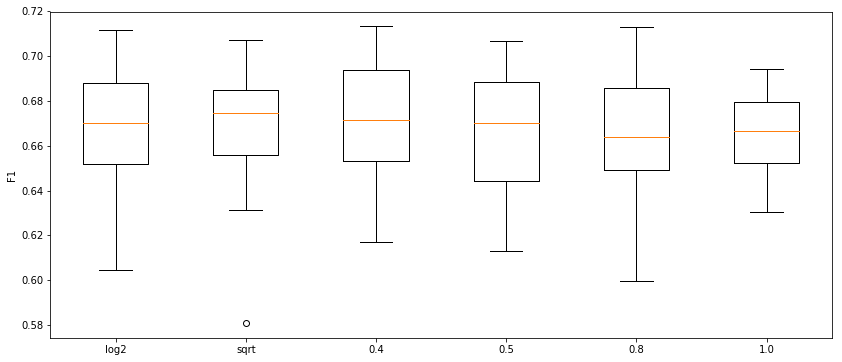

In [137]:
arr = ['log2','sqrt',0.4,0.5,0.8,1.0]
scores = []

for a in arr:
    et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion='entropy', max_features=a)
    score = cross_val_score(et, Xtrain, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### GridSearch

In [138]:
params = {'max_depth': [15,30],
          'min_samples_split': [2,0.1,0.2],
          'min_samples_leaf': [1,0.1],
          'max_features': ['sqrt',0.4,1.0]
         }

et = ExtraTreesClassifier(n_jobs=4, n_estimators=50, criterion='entropy')
et_grid = GridSearchCV(et, params, cv=20, verbose=1, n_jobs=4)
et_grid.fit(Xtrain,ytrain)

print(et_grid.best_params_)
print()

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.3min finished


{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}



Training score = 0.8178564701450367
Test score = 0.7656666666666667

Accuracy = 0.7656666666666667
Precision = 0.47688706846108836
Recall = 0.6141672946495855
F1 Score = 0.5368906455862977
Cohen Kappa Score = 0.38334748749188075
Log Loss = 8.093705741891169



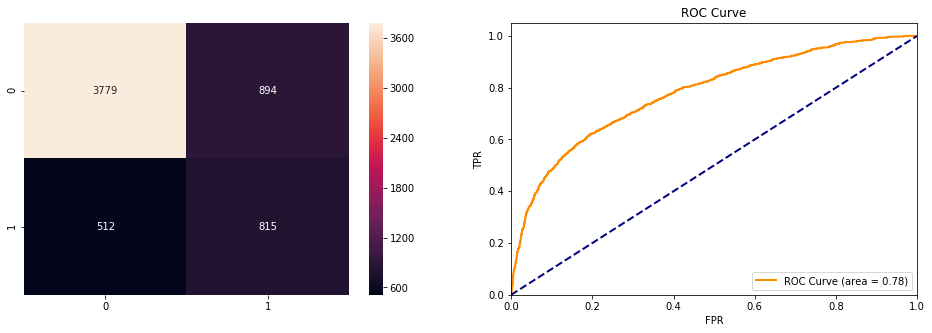

In [174]:
et_best = et_grid.best_estimator_
fit_and_evaluate(et_best, Xtrain, Xtest, ytrain, ytest)

In [175]:
pd.DataFrame({'Feature':Xtrain.columns, 
              'Importance':et_best.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
23,Repay_Sept_Cut,0.096899
5,Repay_Sept,0.075978
48,Num_Late_Payments,0.075768
24,Repay_Aug_Cut,0.049710
25,Repay_July_Cut,0.042577
26,Repay_Jun_Cut,0.031979
0,LIMIT_BAL,0.022454
6,Repay_Aug,0.021827
42,Fraction_Limit_Sept,0.020122
43,Fraction_Limit_Aug,0.018965


## PCA

In [176]:
pca = PCA()
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [177]:
Xtrain_pca = pca.transform(Xtrain)
Xtrain_pca.shape

(10618, 49)

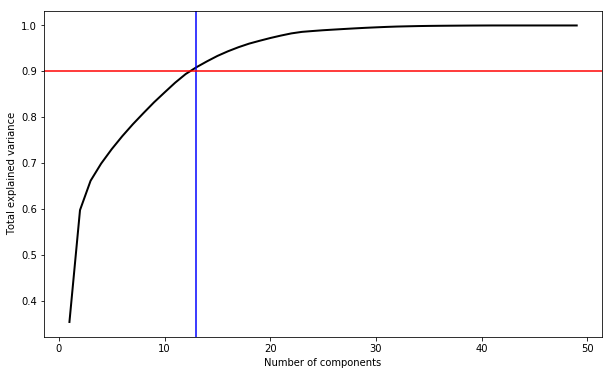

In [178]:
plt.figure(figsize=(10,6))

plt.plot(range(1,50), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(13, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [179]:
pca = PCA(n_components=13)
pca.fit(Xtrain)
Xtrain_pca = pd.DataFrame(pca.transform(Xtrain))
Xtest_pca = pd.DataFrame(pca.transform(Xtest))

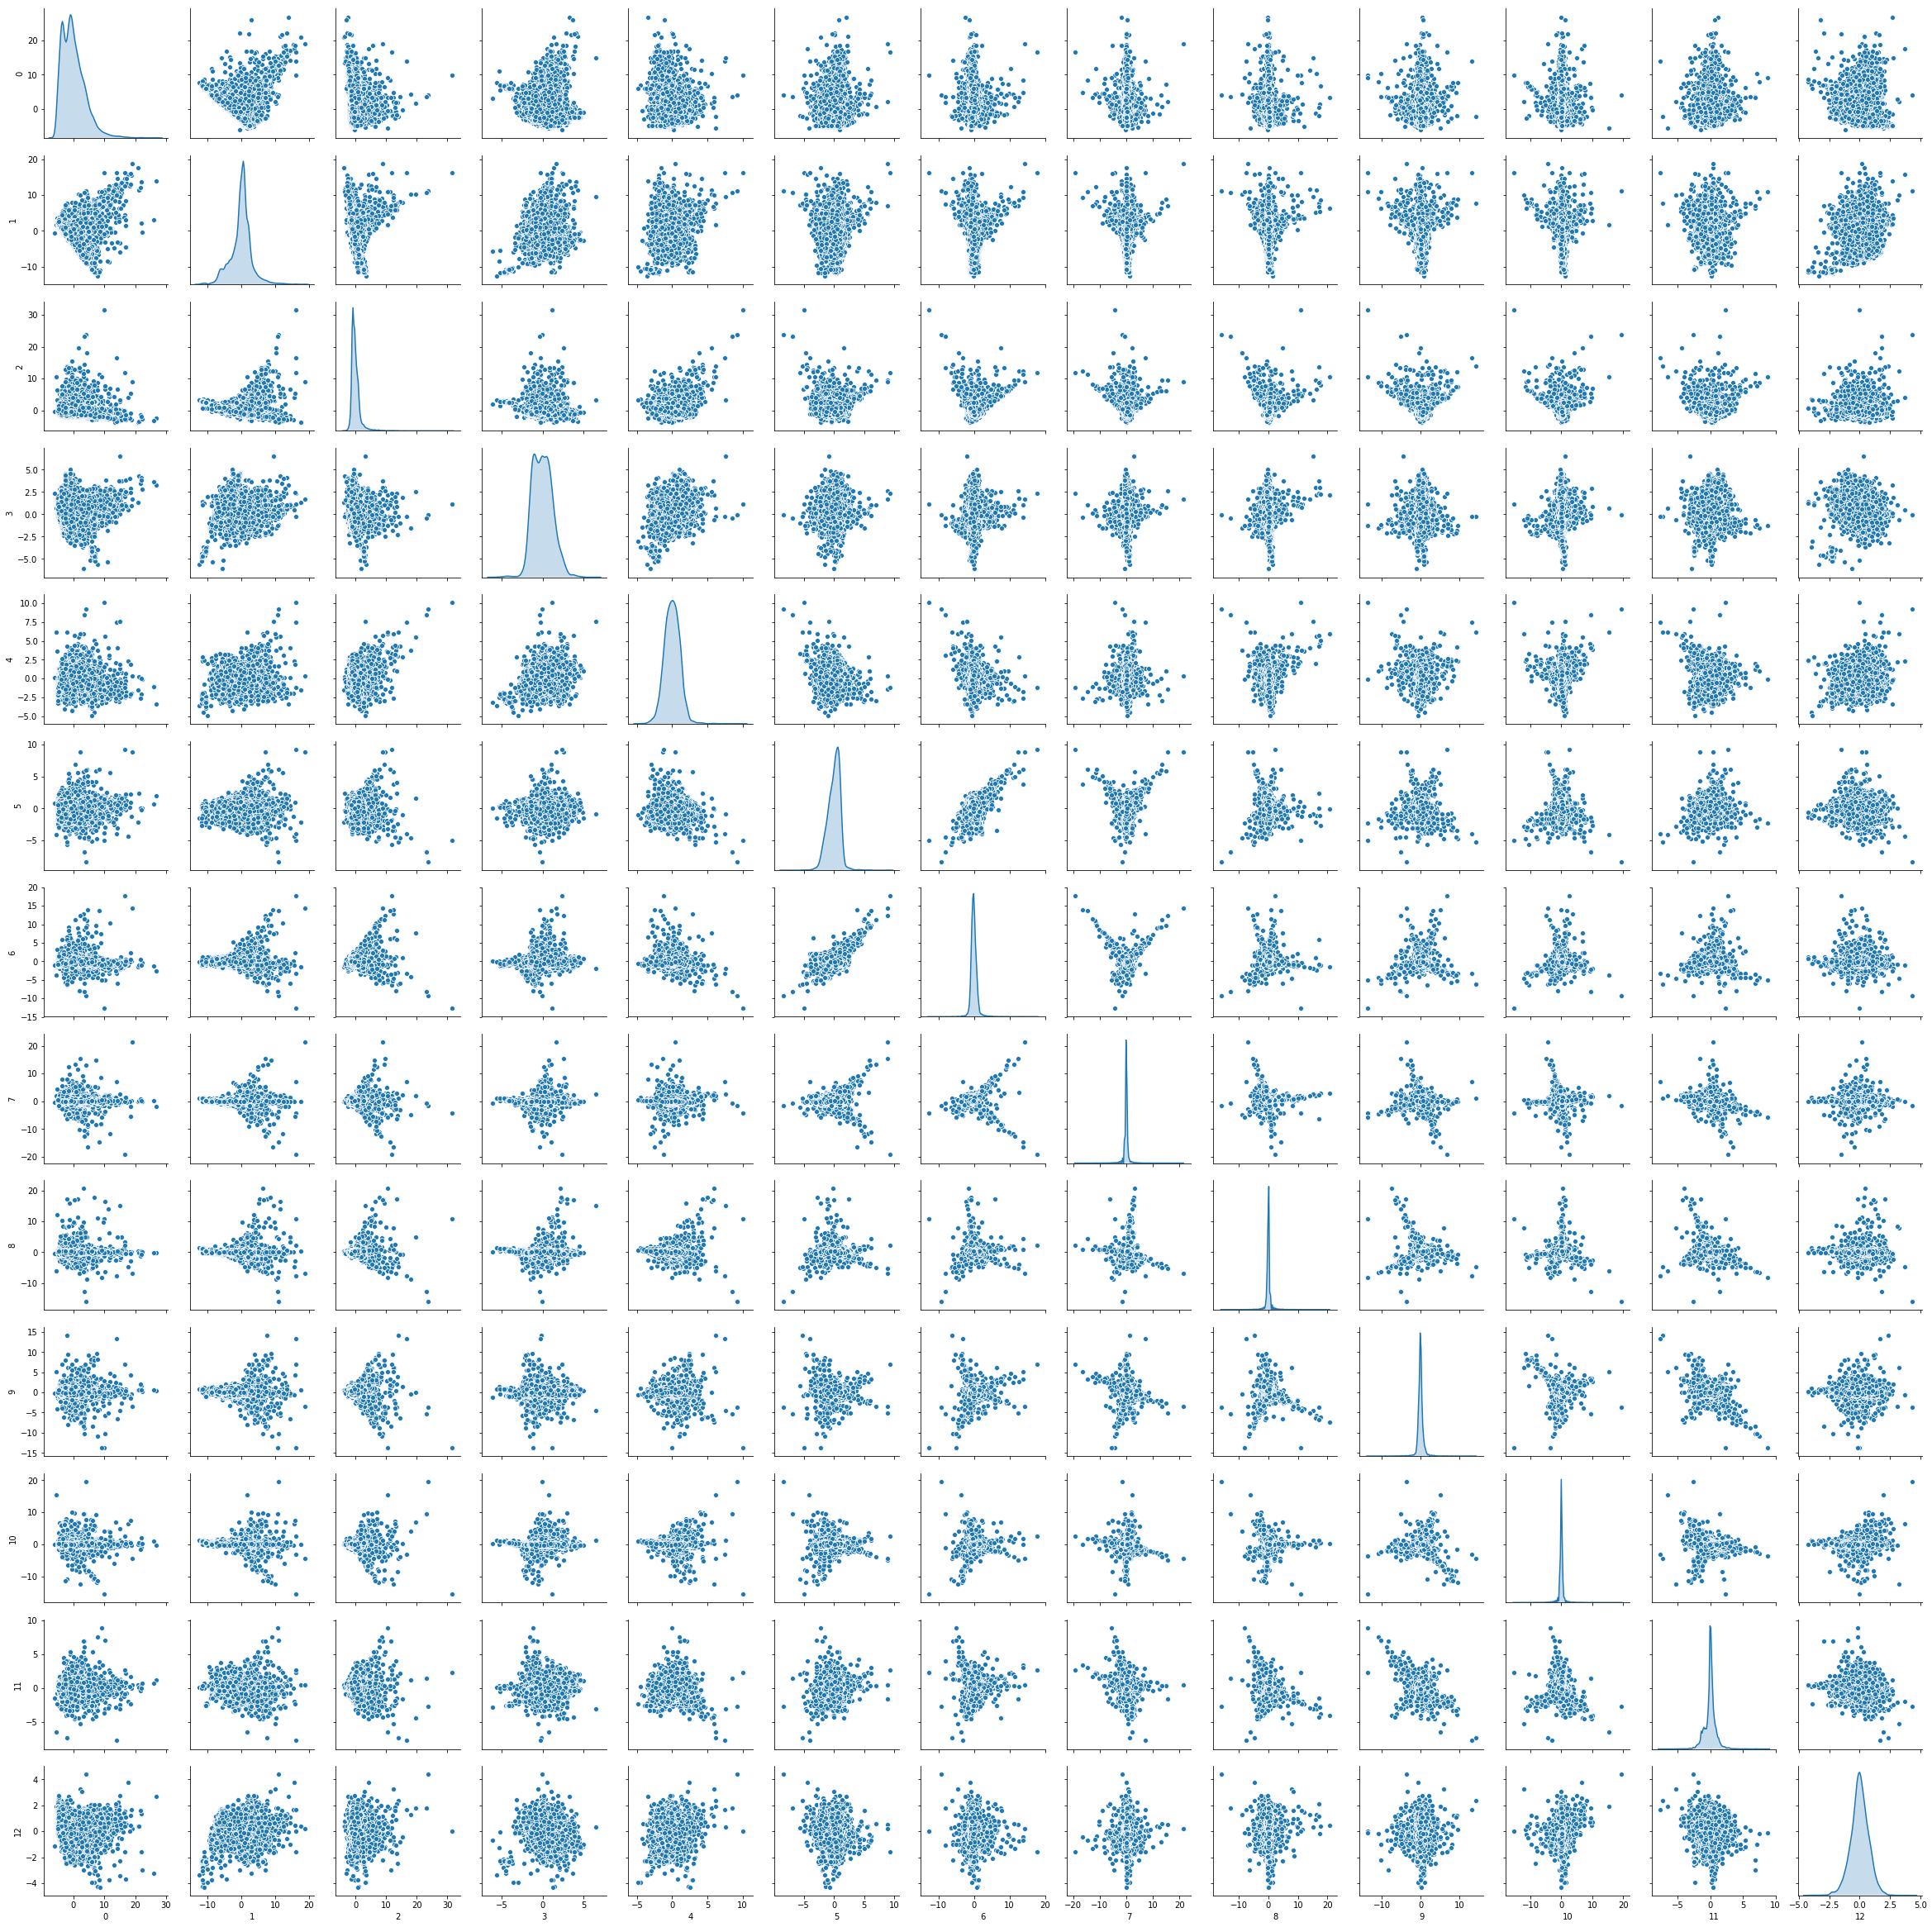

In [180]:
sns.pairplot(Xtrain_pca, diag_kind='kde')
plt.show()

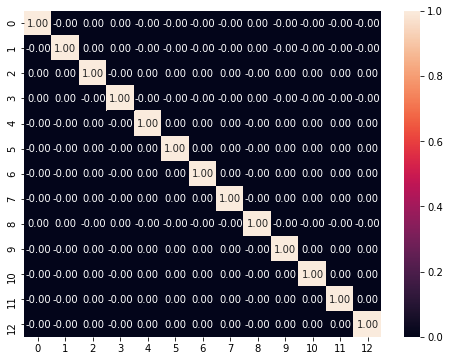

In [181]:
plt.figure(figsize=(8,6))
sns.heatmap(Xtrain_pca.corr(),annot=True,fmt='.2f')
plt.show()

In [182]:
models = {'Logsitic Regression': LogisticRegression(), 
          'Decision Trees': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 
          'KNN': KNeighborsClassifier(),
          'Naive Bayes': GaussianNB()}

compare_models(models, Xtrain_pca, Xtest_pca, ytrain, ytest)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen Kappa Score,Log Loss
Logsitic Regression,0.769000,0.481458,0.577242,0.525017,0.748909,0.374054,7.978567
Decision Trees,0.624333,0.316436,0.602110,0.414849,0.616487,0.175901,12.975297
Random Forest,0.725000,0.417137,0.612660,0.496337,0.731753,0.316457,9.498315
KNN,0.674833,0.369565,0.666164,0.475397,0.728319,0.266800,11.231060
Naive Bayes,0.362500,0.248287,0.928410,0.391795,0.738718,0.065738,22.018967


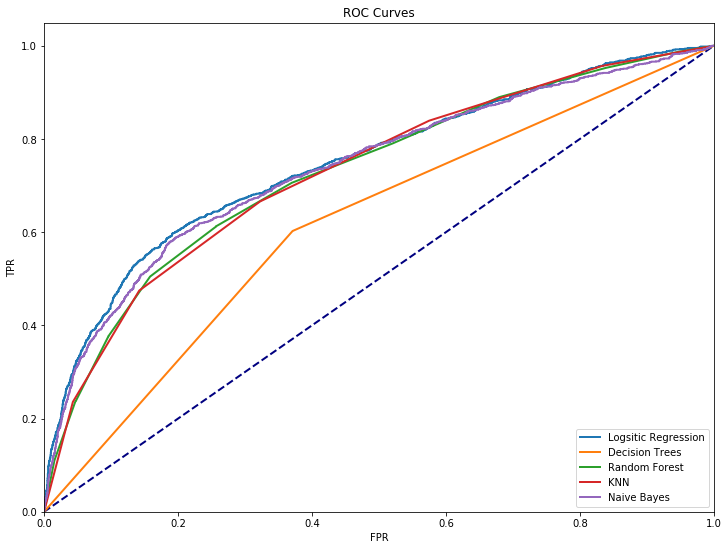

In [183]:
compare_roc_curves(models, Xtrain_pca, Xtest_pca, ytrain, ytest, 'graphs/roc-pca.png')

### Random Forest

#### N Estimators

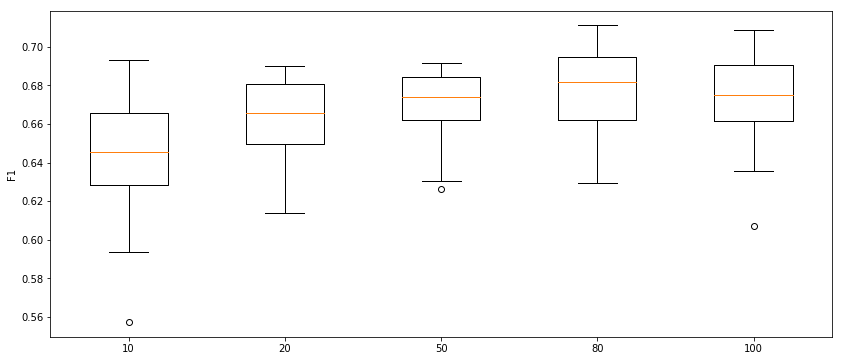

In [186]:
arr = [10,20,50,80,100]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Criterion

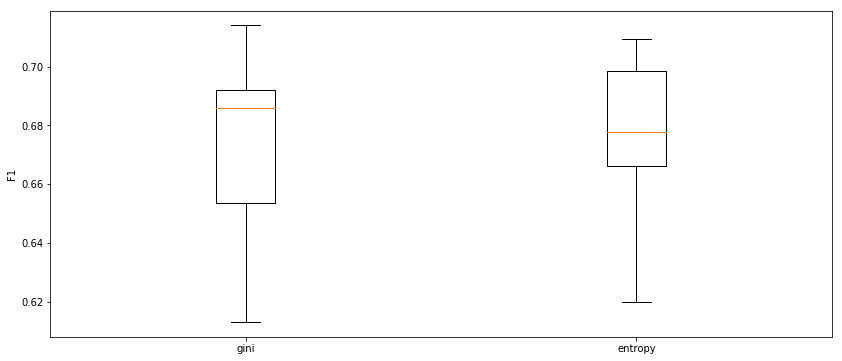

In [187]:
arr = ['gini','entropy']
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=80, criterion=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=20, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Depth

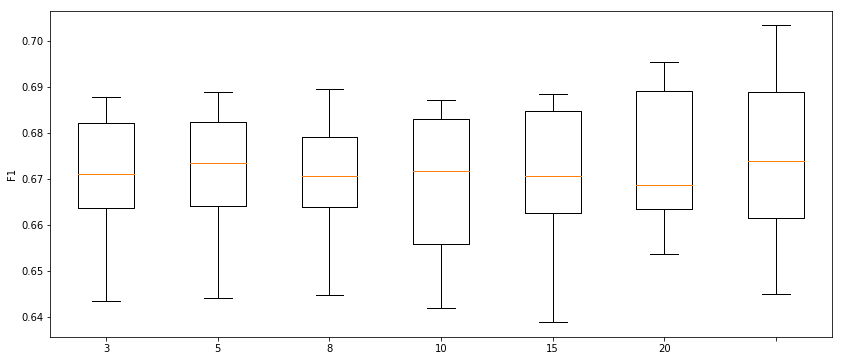

In [188]:
arr = [3, 5, 8, 10, 15, 20, None]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=80, max_depth=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Split

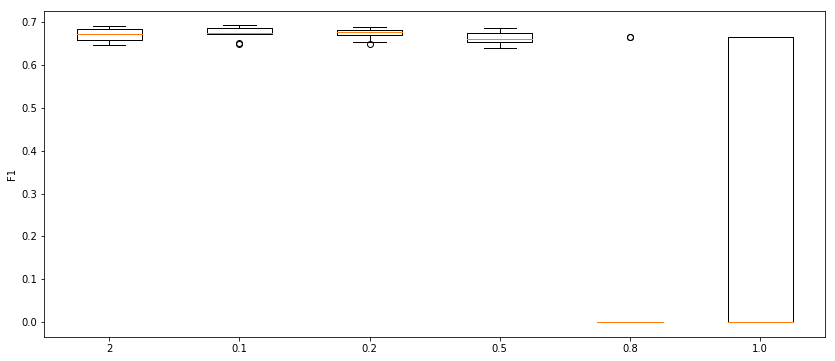

In [189]:
arr = [2,0.1,0.2,0.5,0.8,1.0]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=80, min_samples_split=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Min Samples Leaf

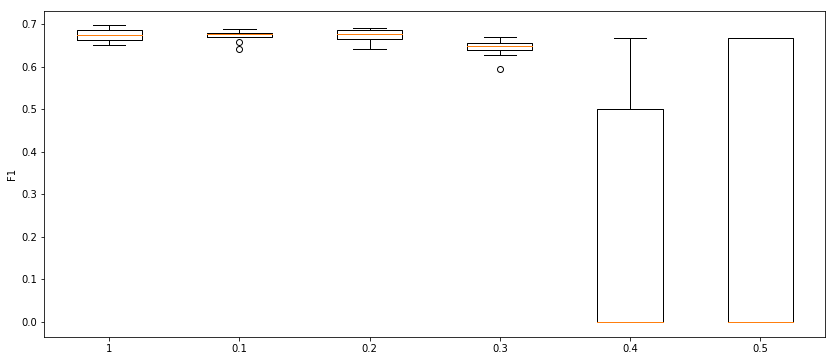

In [190]:
arr = [1,0.1,0.2,0.3,0.4,0.5]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=80, min_samples_leaf=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### Max Features

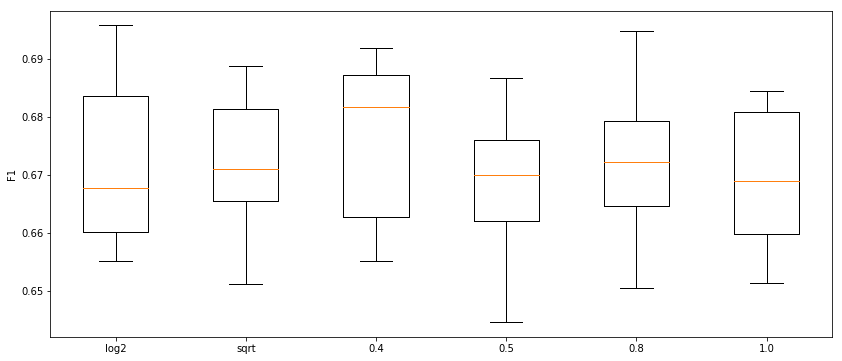

In [191]:
arr = ['log2','sqrt',0.4,0.5,0.8,1.0]
scores = []

for a in arr:
    rf = RandomForestClassifier(n_jobs=4, n_estimators=80, max_features=a)
    score = cross_val_score(rf, Xtrain_pca, ytrain, cv=10, scoring='f1')
    scores.append(score)
    
plot_cv_scores(scores, arr, 'F1')

#### GridSearch

In [192]:
params = {'criterion': ['gini','entropy'],
          'max_depth': [5,10,None],
          'min_samples_split': [0.1,0.2],
          'min_samples_leaf': [1,0.1],
          'max_features': [0.4,0.8]
         }

rf_pca = RandomForestClassifier(n_jobs=4, n_estimators=80)
rf_grid_pca = GridSearchCV(rf_pca, params, cv=10, verbose=1, n_jobs=4)
rf_grid_pca.fit(Xtrain_pca,ytrain)

print(rf_grid_pca.best_params_)
print()

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  6.4min finished


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 0.1}



Training score = 0.7047466566208326
Test score = 0.7536666666666667

Accuracy = 0.7536666666666667
Precision = 0.45803224013340743
Recall = 0.6209495101733233
F1 Score = 0.5271912987843891
Cohen Kappa Score = 0.36573120363590217
Log Loss = 8.508181853195405



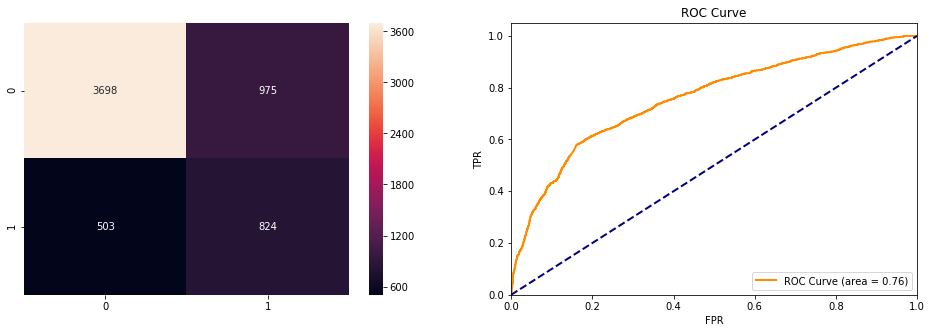

In [193]:
rf_best_pca = rf_grid_pca.best_estimator_
fit_and_evaluate(rf_best_pca, Xtrain_pca, Xtest_pca, ytrain, ytest)